In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

In [2]:
def readColumnsFromFile(filename):
    '''reads in the raw data and returns a list of lists.
    the first list (returned[0]) is the x-coords. '''
    with open(filename) as infile:
        reader = csv.reader(infile, delimiter=" ")
        row_array = []
        
        for row in reader:
            row_data = [col.strip() for col in row]          
            row_array.append(row_data)
            
        #converts rows to columns and removes the last item in the columns list which is just spaces
        #this is an atrifact of the file printing system
        #also has zip output in lists not tuples
        col_array = [list(a) for a in zip(*row_array)]
        del col_array[-1]
        #convert list of lists of strings to list of lists of floats
        #return list([[float(j) for j in i] for i in col_array])
        return np.array([[float(j) for j in i] for i in col_array])

In [20]:
#FGTA simple MIC curves no death
FGTA_simple_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
FGTA_simple_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
FGTA_simple_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
FGTA_simple_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.02-gRateDistribution-FINAL.txt')

FGTA_simple_c_05_spatial = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-c=0.5-spatialDistribution-FINAL.txt')
FGTA_simple_c_05_gRate = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-c=0.5-gRateDistribution-FINAL.txt')
FGTA_simple_c_1_spatial = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-c=1.0-spatialDistribution-FINAL.txt')
FGTA_simple_c_1_gRate = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-c=1.0-gRateDistribution-FINAL.txt')
FGTA_simple_c_2_spatial = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-c=2.0-spatialDistribution-FINAL.txt')
FGTA_simple_c_2_gRate = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.02-gRateDistribution-FINAL.txt')


#SGTA simple MIC curves no death
SGTA_simple_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
SGTA_simple_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
SGTA_simple_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
SGTA_simple_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.02-gRateDistribution-FINAL.txt')

SGTA_simple_c_05_spatial = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-c=0.5-spatialDistribution-FINAL.txt')
SGTA_simple_c_05_gRate = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-c=0.5-gRateDistribution-FINAL.txt')
SGTA_simple_c_1_spatial = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-c=1.0-spatialDistribution-FINAL.txt')
SGTA_simple_c_1_gRate = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-c=1.0-gRateDistribution-FINAL.txt')
SGTA_simple_c_2_spatial = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-c=2.0-spatialDistribution-FINAL.txt')
SGTA_simple_c_2_gRate = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.02-gRateDistribution-FINAL.txt')


#GITA (growth rate independent - flat mic) simple MIC curves no death
GITA_simple_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/simple_flat_growers/simple-flatGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
GITA_simple_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/simple_flat_growers/simple-flatGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
GITA_simple_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/simple_flat_growers/simple-flatGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
GITA_simple_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/simple_flat_growers/simple-flatGrowers-alpha=0.02-gRateDistribution-FINAL.txt')


#Realistic growth curves
FGTA_realistic_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-fastGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
FGTA_realistic_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-fastGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
FGTA_realistic_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-fastGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
FGTA_realistic_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-fastGrowers-alpha=0.02-gRateDistribution-FINAL.txt')

SGTA_realistic_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-slowGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
SGTA_realistic_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-slowGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
SGTA_realistic_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-slowGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
SGTA_realistic_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-slowGrowers-alpha=0.02-gRateDistribution-FINAL.txt')


#Realistic beta-swapped curves
FGTA_realistic_BS_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-fastGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
FGTA_realistic_BS_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-fastGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
FGTA_realistic_BS_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-fastGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
FGTA_realistic_BS_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-fastGrowers-alpha=0.02-gRateDistribution-FINAL.txt')

SGTA_realistic_BS_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-slowGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
SGTA_realistic_BS_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-slowGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
SGTA_realistic_BS_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-slowGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
SGTA_realistic_BS_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-slowGrowers-alpha=0.02-gRateDistribution-FINAL.txt')



#With death
FGTA_wDeath_alpha_specificAlpha_aliveSpatial = readColumnsFromFile('MasterPlotFolder/with_death/fastGrowers_death-alpha=0.004884694070738408-aliveSpatialDistribution-FINAL.txt')
FGTA_wDeath_alpha_specificAlpha_deadSpatial = readColumnsFromFile('MasterPlotFolder/with_death/fastGrowers_death-alpha=0.004884694070738408-deadSpatialDistribution-FINAL.txt')
FGTA_wDeath_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/with_death/fastGrowers_death-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')

SGTA_wDeath_alpha_specificAlpha_aliveSpatial = readColumnsFromFile('MasterPlotFolder/with_death/slowGrowers_death-alpha=0.004884694070738408-aliveSpatialDistribution-FINAL.txt')
SGTA_wDeath_alpha_specificAlpha_deadSpatial = readColumnsFromFile('MasterPlotFolder/with_death/slowGrowers_death-alpha=0.004884694070738408-deadSpatialDistribution-FINAL.txt')
SGTA_wDeath_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/with_death/slowGrowers_death-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')

#######################################################
# uniform c
#spatial
FGTA_const_c_02_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=0.2-spatialDistribution-FINAL.txt')
FGTA_const_c_05_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=0.5-spatialDistribution-FINAL.txt')
FGTA_const_c_08_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=0.8-spatialDistribution-FINAL.txt')
FGTA_const_c_1_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=1.0-spatialDistribution-FINAL.txt')
FGTA_const_c_2_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=2.0-spatialDistribution-FINAL.txt')

FGTA_const_c_8_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=8.0-spatialDistribution-FINAL.txt')


SGTA_const_c_02_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=0.2-spatialDistribution-FINAL.txt')
SGTA_const_c_05_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=0.5-spatialDistribution-FINAL.txt')
SGTA_const_c_08_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=0.8-spatialDistribution-FINAL.txt')
SGTA_const_c_1_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=1.0-spatialDistribution-FINAL.txt')
SGTA_const_c_2_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=2.0-spatialDistribution-FINAL.txt')
SGTA_const_c_5_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=5.0-spatialDistribution-FINAL.txt')
SGTA_const_c_8_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=8.0-spatialDistribution-FINAL.txt')


# gRate
FGTA_const_c_02_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=0.2-gRateDistribution-FINAL.txt')
FGTA_const_c_05_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=0.5-gRateDistribution-FINAL.txt')
FGTA_const_c_08_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=0.8-gRateDistribution-FINAL.txt')
FGTA_const_c_1_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=1.0-gRateDistribution-FINAL.txt')
FGTA_const_c_2_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=2.0-gRateDistribution-FINAL.txt')

FGTA_const_c_8_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=8.0-gRateDistribution-FINAL.txt')


SGTA_const_c_02_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=0.2-gRateDistribution-FINAL.txt')
SGTA_const_c_05_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=0.5-gRateDistribution-FINAL.txt')
SGTA_const_c_08_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=0.8-gRateDistribution-FINAL.txt')
SGTA_const_c_1_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=1.0-gRateDistribution-FINAL.txt')
SGTA_const_c_2_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=2.0-gRateDistribution-FINAL.txt')
SGTA_const_c_5_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=5.0-gRateDistribution-FINAL.txt')
SGTA_const_c_8_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=8.0-gRateDistribution-FINAL.txt')







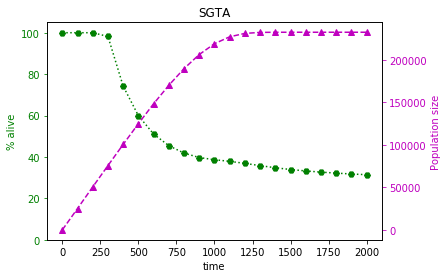

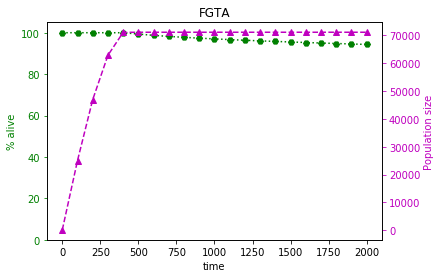

In [4]:
def percentAliveAndSizeOverTime(alive_data, dead_data, title):
    
    pc_alive_t = []
    size_of_pop_t = []
    t = [i for i in np.linspace(0., 2000., 21)]
    
    
    for live_pop, dead_pop in zip(alive_data[1:], dead_data[1:]):
        
        num_alive = sum(live_pop)
        num_dead = sum(dead_pop)
        
        size_of_pop_t.append(num_alive+num_dead)
        pc_alive_t.append((num_alive/(num_alive+num_dead))*100.)

        
    fig, ax1 = plt.subplots()
    ax1.plot(t, pc_alive_t, 'gH:')
    ax1.set_xlabel('time')
    ax1.set_ylabel('% alive', color='g')
    ax1.tick_params('y', colors='g')
    ax1.set_ylim(0, 105.)
    
    ax2 = ax1.twinx()
    ax2.plot(t, size_of_pop_t, 'm^--')
    ax2.set_ylabel('Population size', color='m')
    ax2.tick_params('y', colors='m')
    
    #fig.tight_layout()
    plt.title(title)
    plt.savefig(title+'-percentAlive-PopSize-overTime.png')
    plt.show()
    
percentAliveAndSizeOverTime(SGTA_wDeath_alpha_specificAlpha_aliveSpatial, SGTA_wDeath_alpha_specificAlpha_deadSpatial, "SGTA")
percentAliveAndSizeOverTime(FGTA_wDeath_alpha_specificAlpha_aliveSpatial, FGTA_wDeath_alpha_specificAlpha_deadSpatial, "FGTA") 

In [5]:
def getPercentAliveAndPopSizeOverTime(liveData, deadData):
    '''method to get the lists of percentage of the population alive and population size 
    over time for the death antibiotics'''
    
    pc_alive_t = []
    size_of_pop_t = []
    t = [i for i in np.linspace(0., 2000., 21)]
    
    
    for live_pop, dead_pop in zip(liveData[1:], deadData[1:]):
        
        num_alive = sum(live_pop)
        num_dead = sum(dead_pop)
        
        size_of_pop_t.append(num_alive+num_dead)
        pc_alive_t.append((num_alive/(num_alive+num_dead))*100.)
    
    
    return pc_alive_t, size_of_pop_t


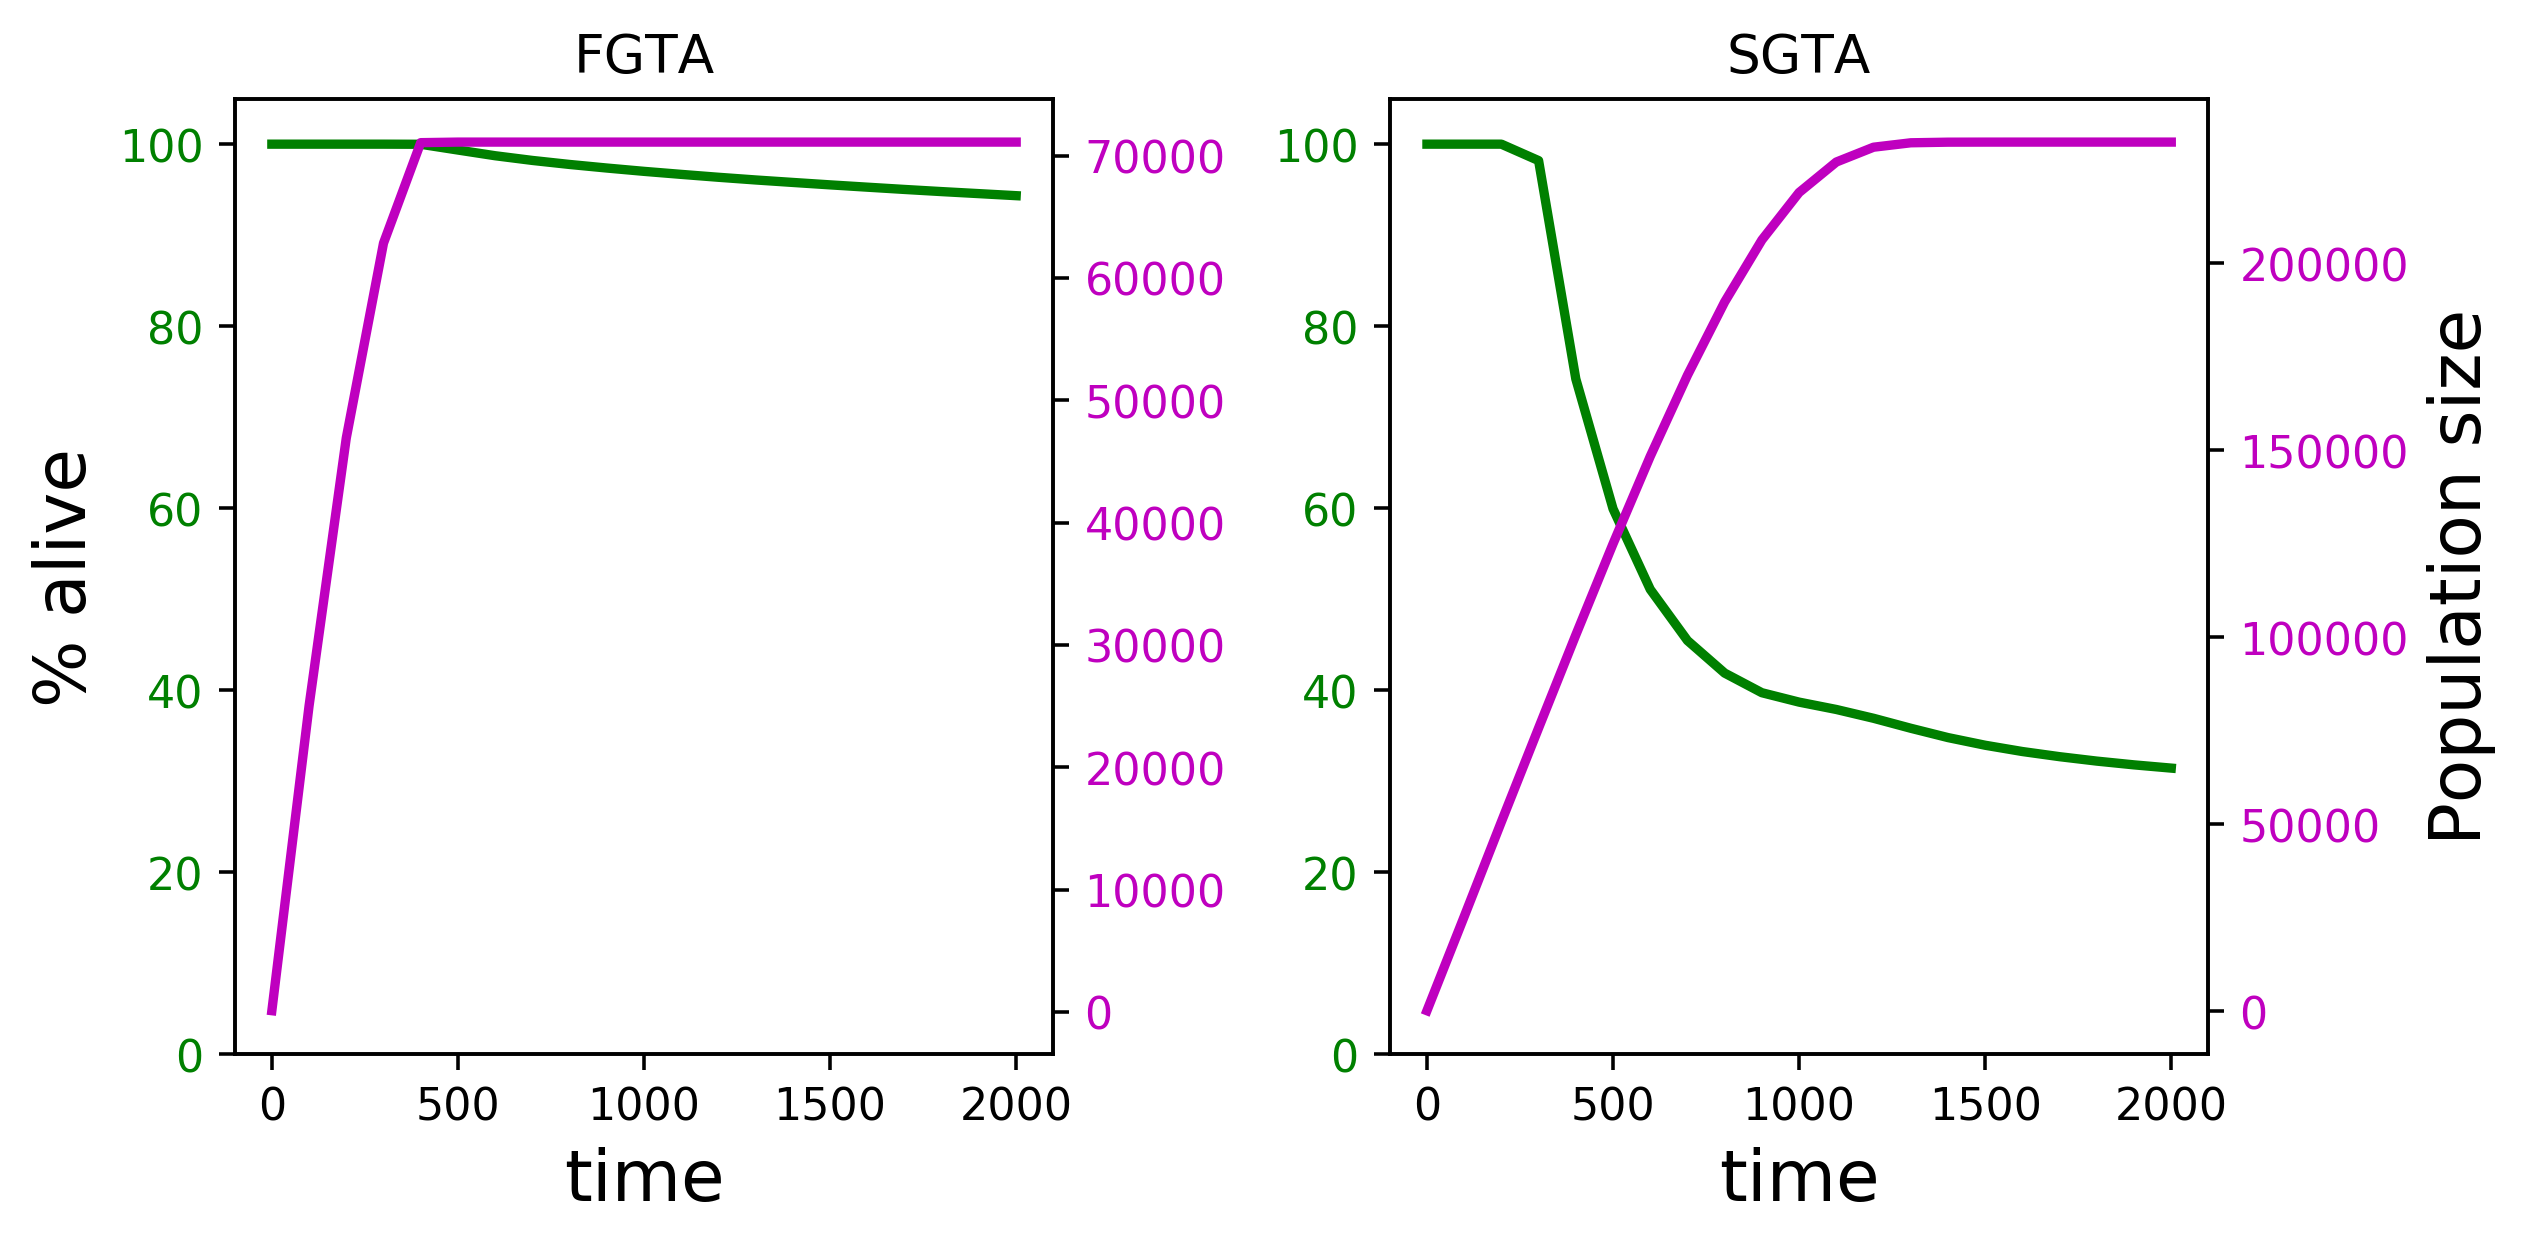

In [6]:
def percentAliveOverTimeSideBySide(FGTA_alive_data, FGTA_dead_data, SGTA_alive_data, SGTA_dead_data):
    '''This makes one plot of both the percentage plots'''
    
    FGTA_pc_alive_t = []
    FGTA_size_of_pop_t = []
    SGTA_pc_alive_t = []
    SGTA_size_of_pop_t = []
    t = [i for i in np.linspace(0., 2000., 21)]
    
    #this combines all the lists together in a way which allows us to iterate over them all in one loop
    for FGTA_alive_pop, FGTA_dead_pop, SGTA_alive_pop, SGTA_dead_pop in zip(FGTA_alive_data[1:], FGTA_dead_data[1:], SGTA_alive_data[1:], SGTA_dead_data[1:]):
        
        FGTA_num_alive = sum(FGTA_alive_pop)
        FGTA_num_dead = sum(FGTA_dead_pop)
        
        SGTA_num_alive = sum(SGTA_alive_pop)
        SGTA_num_dead = sum(SGTA_dead_pop)
        
        FGTA_size_of_pop_t.append(FGTA_num_alive+FGTA_num_dead)
        FGTA_pc_alive_t.append((FGTA_num_alive/(FGTA_num_alive+FGTA_num_dead))*100.)
        
        SGTA_size_of_pop_t.append(SGTA_num_alive+SGTA_num_dead)
        SGTA_pc_alive_t.append((SGTA_num_alive/(SGTA_num_alive+SGTA_num_dead))*100.)
        
    
    #here we do all the plotting
    pc_colour, pc_marker = ['g', 'H']
    num_colour, num_marker = ['m', '^']
    
    def two_scales(ax1, time, data1, data2, c1, c2, m1, m2):
        ax2 = ax1.twinx()
        ax1.plot(time, data1, color=c1, linewidth=2.1)
        ax1.set_xlabel('time', fontsize=16)
        #ax1.set_ylabel('% alive')
        ax1.set_ylim([0.,105.])
        ax2.plot(time, data2, color=c2, linewidth=2.1)
        #ax2.set_ylabel('Population size')
        return ax1, ax2
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), dpi=320)
    ax1, ax1a = two_scales(ax1, t, FGTA_pc_alive_t, FGTA_size_of_pop_t, pc_colour, num_colour, pc_marker, num_marker)
    ax2, ax2a = two_scales(ax2, t, SGTA_pc_alive_t, SGTA_size_of_pop_t, pc_colour, num_colour, pc_marker, num_marker)

    # Change color of each axis
    def color_y_axis(ax, color):
        """Color your axes."""
        for t in ax.get_yticklabels():
            t.set_color(color)

    color_y_axis(ax1, pc_colour)
    color_y_axis(ax1a, num_colour)
    color_y_axis(ax2, pc_colour)
    color_y_axis(ax2a, num_colour)
    
    ax1.set_ylabel('% alive', fontsize=16)
    ax2a.set_ylabel('Population size', fontsize=16)
    ax1.set_title("FGTA")
    ax2.set_title("SGTA")
    plt.tight_layout()
    plt.savefig('bothAntibiotics-percentAlive-PopSize-overTime.png')
    #plt.show()  
    
percentAliveOverTimeSideBySide(FGTA_alive_data=FGTA_wDeath_alpha_specificAlpha_aliveSpatial, FGTA_dead_data=FGTA_wDeath_alpha_specificAlpha_deadSpatial, SGTA_alive_data=SGTA_wDeath_alpha_specificAlpha_aliveSpatial, SGTA_dead_data=SGTA_wDeath_alpha_specificAlpha_deadSpatial)


In [7]:
def plotAllMeasurementsIndividually(data, title, yLabel, antibiotic_type='SGTA', alphaVal='specific_alpha'):
    '''This plots each time measurement individually and saves them in a breakdown folder.'''
    
    timestep = 100.
    max_value = np.amax(data[1:])
    min_value = np.amin(data[1:])
    
    for i in range(1, len(data)):
        plt.gcf().clear()
        plt.ylim(min_value+(0.1*min_value), max_value+(0.1*max_value))
        plt.plot(data[0], data[i], linewidth=2.5)
        plt.title(antibiotic_type+' '+title+' - t ='+str(timestep*(i-1)))
        plt.axhline(0, color='black')
        plt.xlabel('Microhabitat')
        plt.ylabel(yLabel)
        
        plt.savefig(antibiotic_type+'-'+title+'-breakdown/'+antibiotic_type+'-alpha='+alphaVal+'-'+
                    title+'-t='+str(timestep*(i-1))+'.png')
        plt.gcf().clear()
        
    for measurement in data[1:]:
        plt.plot(data[0], measurement, linewidth=2.5)
        plt.title(antibiotic_type+' '+title+' (all)')
        plt.xlabel('Microhabitat')
        plt.ylabel(yLabel)
    plt.axhline(0, color='black')
    plt.savefig(antibiotic_type+'-'+title+'-breakdown/'+antibiotic_type+'-alpha='+alphaVal+'-'+title+'-all.png')

In [8]:
def getExponentialAntibioticConcentrations(alpha, xData):
    '''returns the exponential antiiotic gradients for a given alpha'''
    cData = []
    
    for x in xData:
        cData.append(math.exp(alpha*x) - 1.)
        
    return cData



In [9]:
def plotThreeDistributionsSideBySide(data1, data2, data3, y_label, linColour, filename):
    
    max_value = max(np.amax(data1[1:]), np.amax(data2[1:]), np.amax(data3[1:]))
    min_value = min(np.amin(data1[1:]), np.amin(data2[1:]), np.amin(data3[1:]))
    max_value_X = max(np.amax(data1[0]), np.amax(data2[0]), np.amax(data3[0]))
    lineWidth = 1.5
    
    
    fig, axarr = plt.subplots(1, 3, sharey=True, figsize=(8,3), dpi=300)
    for i in range(1, len(data1)):
        if i%4 == 0:
            axarr[0].plot(data1[0], data1[i], linewidth=lineWidth, color='black')
            axarr[1].plot(data2[0], data2[i], linewidth=lineWidth, color='black')
            axarr[2].plot(data3[0], data3[i], linewidth=lineWidth, color='black')
        else:
            axarr[0].plot(data1[0], data1[i], linewidth=lineWidth, color=linColour)
            axarr[1].plot(data2[0], data2[i], linewidth=lineWidth, color=linColour)
            axarr[2].plot(data3[0], data3[i], linewidth=lineWidth, color=linColour)
            
    for ax in axarr:
        ax.set_xlim(0,500)
        ax.set_ylim(min_value+(0.1*min_value), max_value+(0.2*max_value))
        ax.tick_params(direction='in')
        # below code adds an arrow above the graphs indicating the direction of time
        ax.annotate('', xy=(0.7*max_value_X, 1.06*max_value), xytext=(0.2*max_value_X, 1.06*max_value), arrowprops=dict(arrowstyle="->"))
        ax.text(0.36*max_value_X, 1.08*max_value, 'time', fontsize=12)
      
    
    
    axarr[0].set_title('FGTA')
    axarr[1].set_title('GITA')
    axarr[2].set_title('SGTA')
    
    axarr[0].text(0.85*max_value_X, 1.05*max_value, '(a)', fontsize=16)
    axarr[1].text(0.85*max_value_X, 1.05*max_value, '(b)', fontsize=16)
    axarr[2].text(0.85*max_value_X, 1.05*max_value, '(c)', fontsize=16)
    
    axarr[0].set_ylabel(y_label, fontsize=16)
    axarr[1].set_xlabel('Microhabitat', fontsize=16)
    
    plt.subplots_adjust(wspace=0.8)
    plt.tight_layout()
    plt.savefig(filename)
            
   
    
    

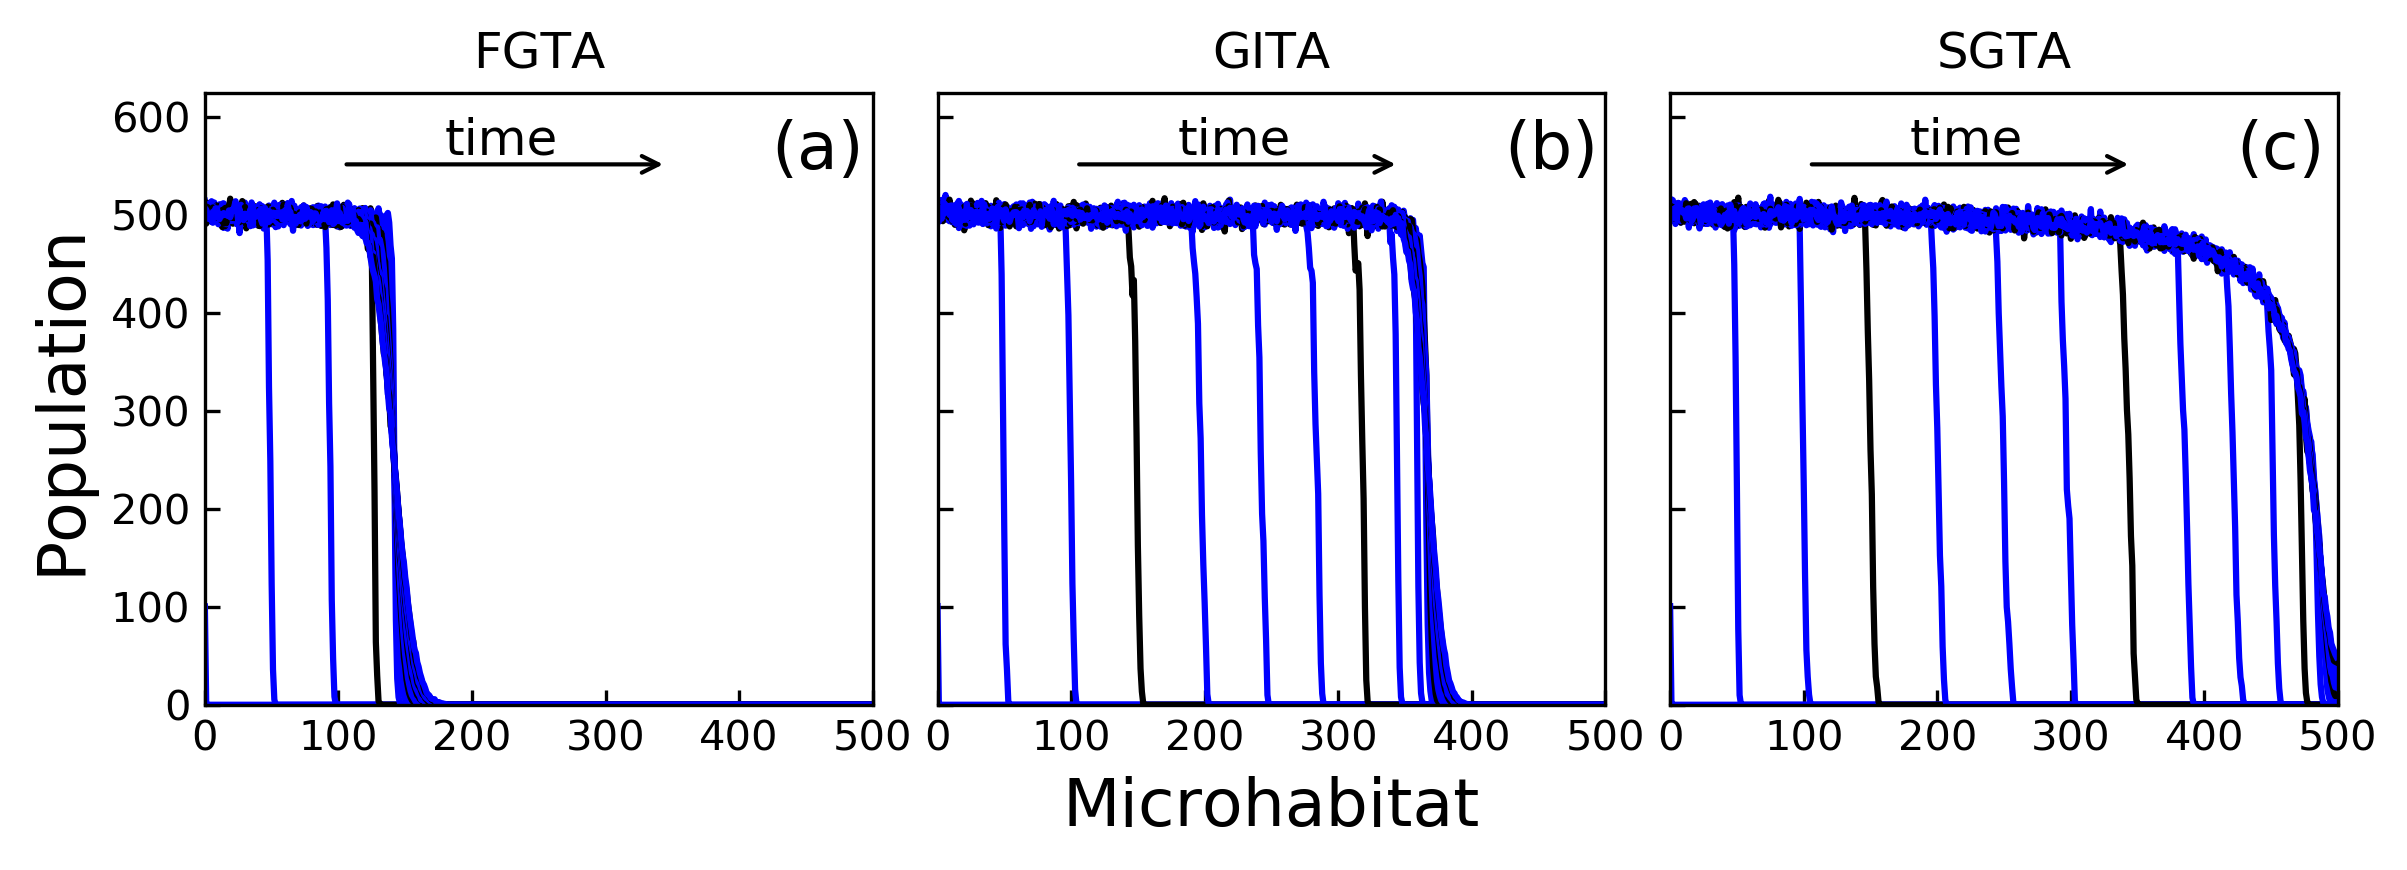

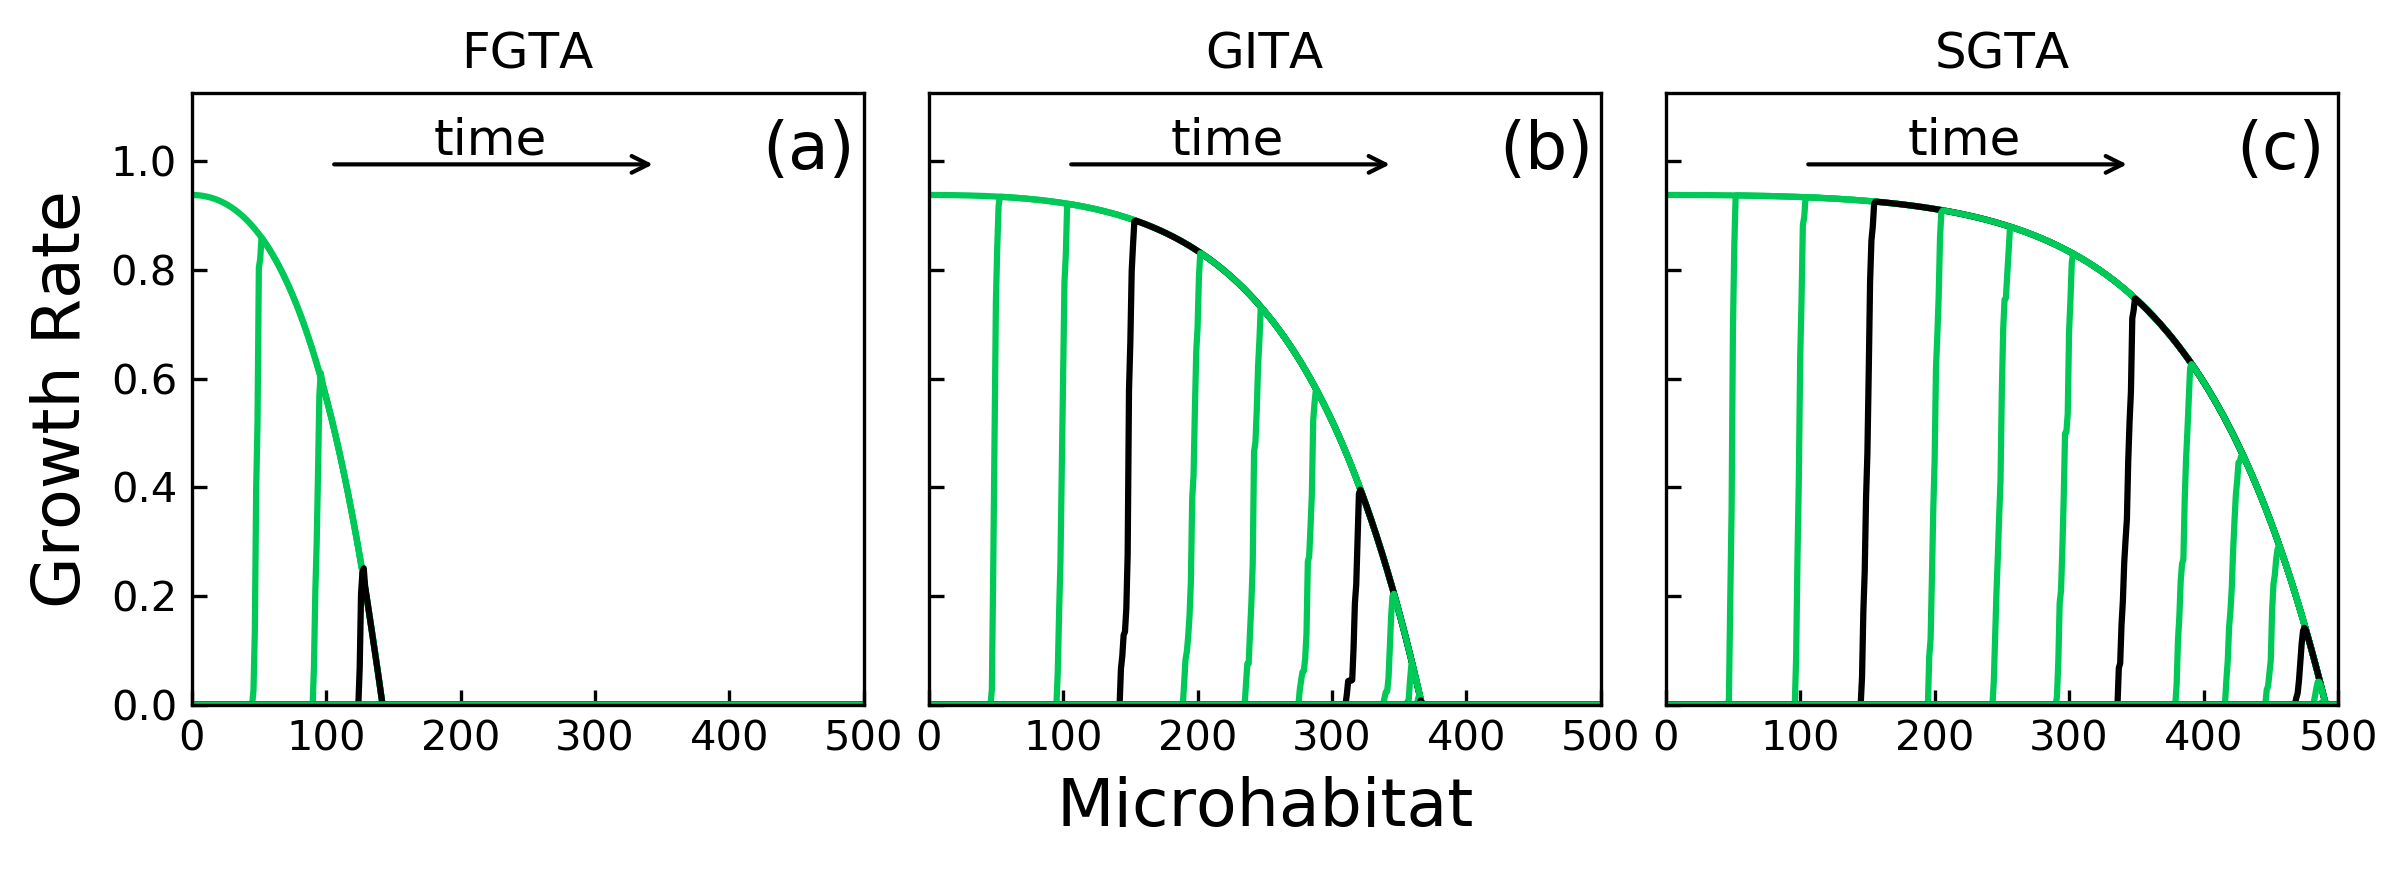

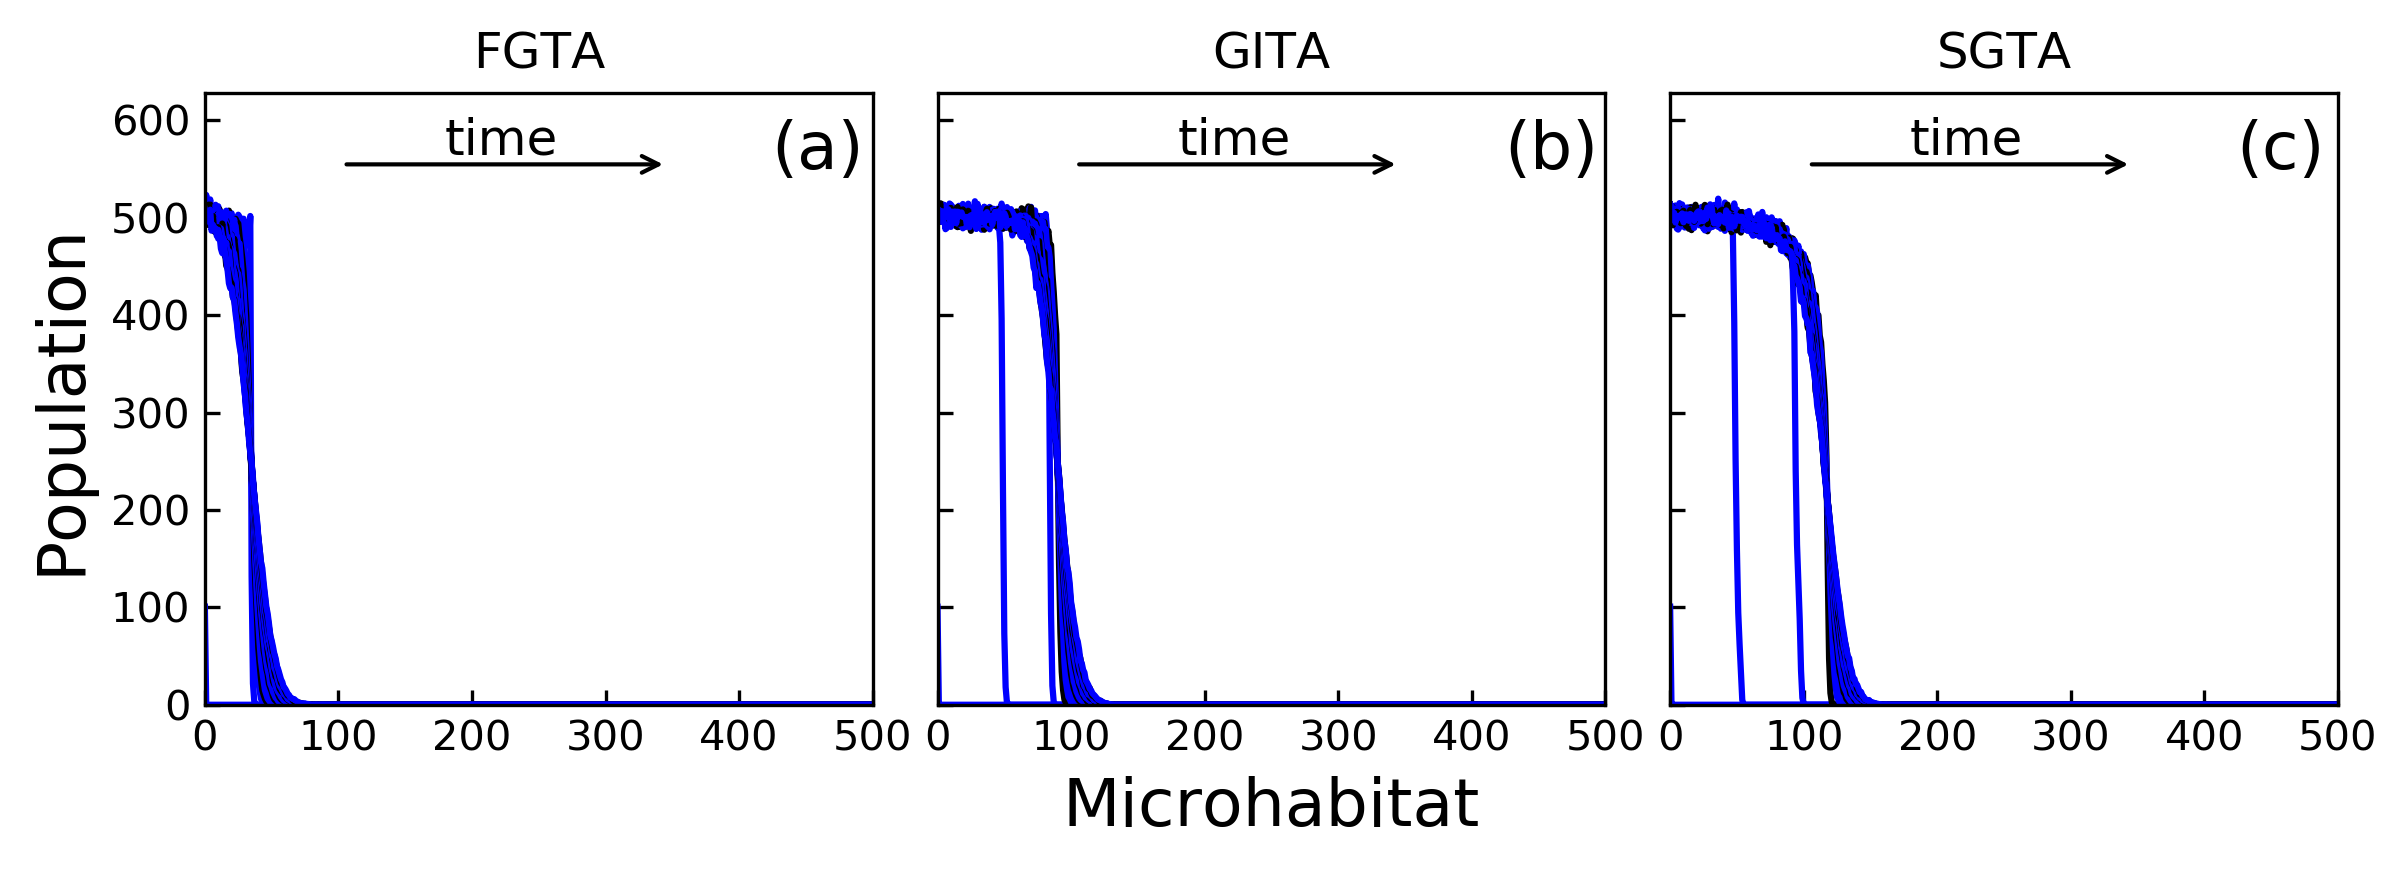

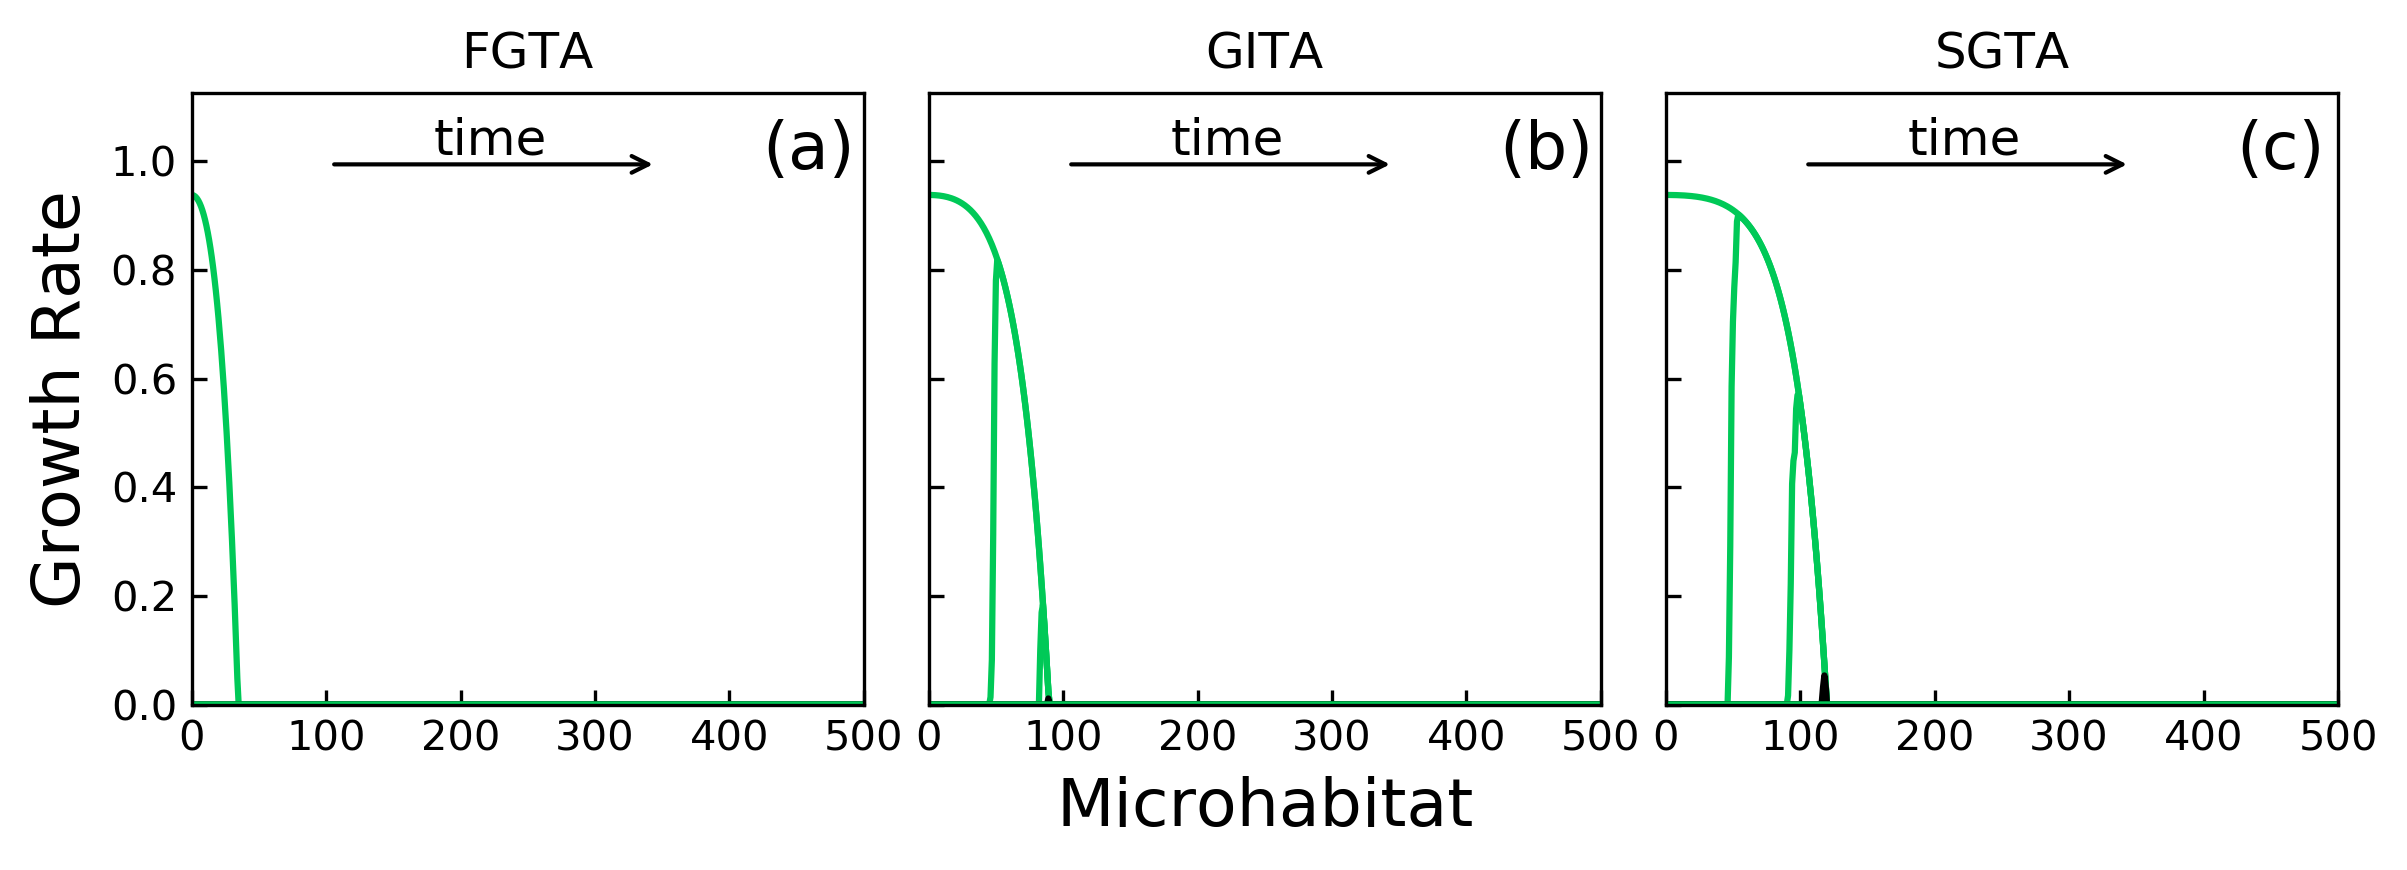

In [10]:
popColour = 'blue'
gRateColour = '#00C957'
popYLabel = 'Population'
gRateYLabel = 'Growth Rate'

string1 = 'simple-no_death-alpha=specific_alpha-spatialDistb.png'
plotThreeDistributionsSideBySide(FGTA_simple_alpha_specificAlpha_spatial, GITA_simple_alpha_specificAlpha_spatial, SGTA_simple_alpha_specificAlpha_spatial, popYLabel, popColour, string1)

string2 = 'simple-no_death-alpha=specific_alpha-gRateDistb.png'
plotThreeDistributionsSideBySide(FGTA_simple_alpha_specificAlpha_gRate, GITA_simple_alpha_specificAlpha_gRate, SGTA_simple_alpha_specificAlpha_gRate, gRateYLabel, gRateColour, string2)

string3 = 'simple-no_death-alpha=0.02-spatialDistb.png'
plotThreeDistributionsSideBySide(FGTA_simple_alpha_002_spatial, GITA_simple_alpha_002_spatial, SGTA_simple_alpha_002_spatial, popYLabel, popColour, string3)

string4 = 'simple-no_death-alpha=0.02-gRateDistb.png'
plotThreeDistributionsSideBySide(FGTA_simple_alpha_002_gRate, GITA_simple_alpha_002_gRate, SGTA_simple_alpha_002_gRate, gRateYLabel, gRateColour, string4)





In [11]:
def getWavefrontPositionsVsT(data1, data2, data3):
    
    popThreshold = 20.
    t = [i for i in np.linspace(0., 2000., 21)]
    data1_wavefronts = []
    data2_wavefronts = []
    data3_wavefronts = []
    
    #here we iterate over the input data and get the max indices of the data where the population
    #is above a certain threshold. this gives us the wavefron position over time
    for i in range(1, len(data1)):
        data1_wavefronts.append(max((x, y) for x, y in enumerate(data1[i]) if y > popThreshold)[0])
        data2_wavefronts.append(max((x, y) for x, y in enumerate(data2[i]) if y > popThreshold)[0])
        data3_wavefronts.append(max((x, y) for x, y in enumerate(data3[i]) if y > popThreshold)[0])
    
    return data1_wavefronts, data2_wavefronts, data3_wavefronts, t

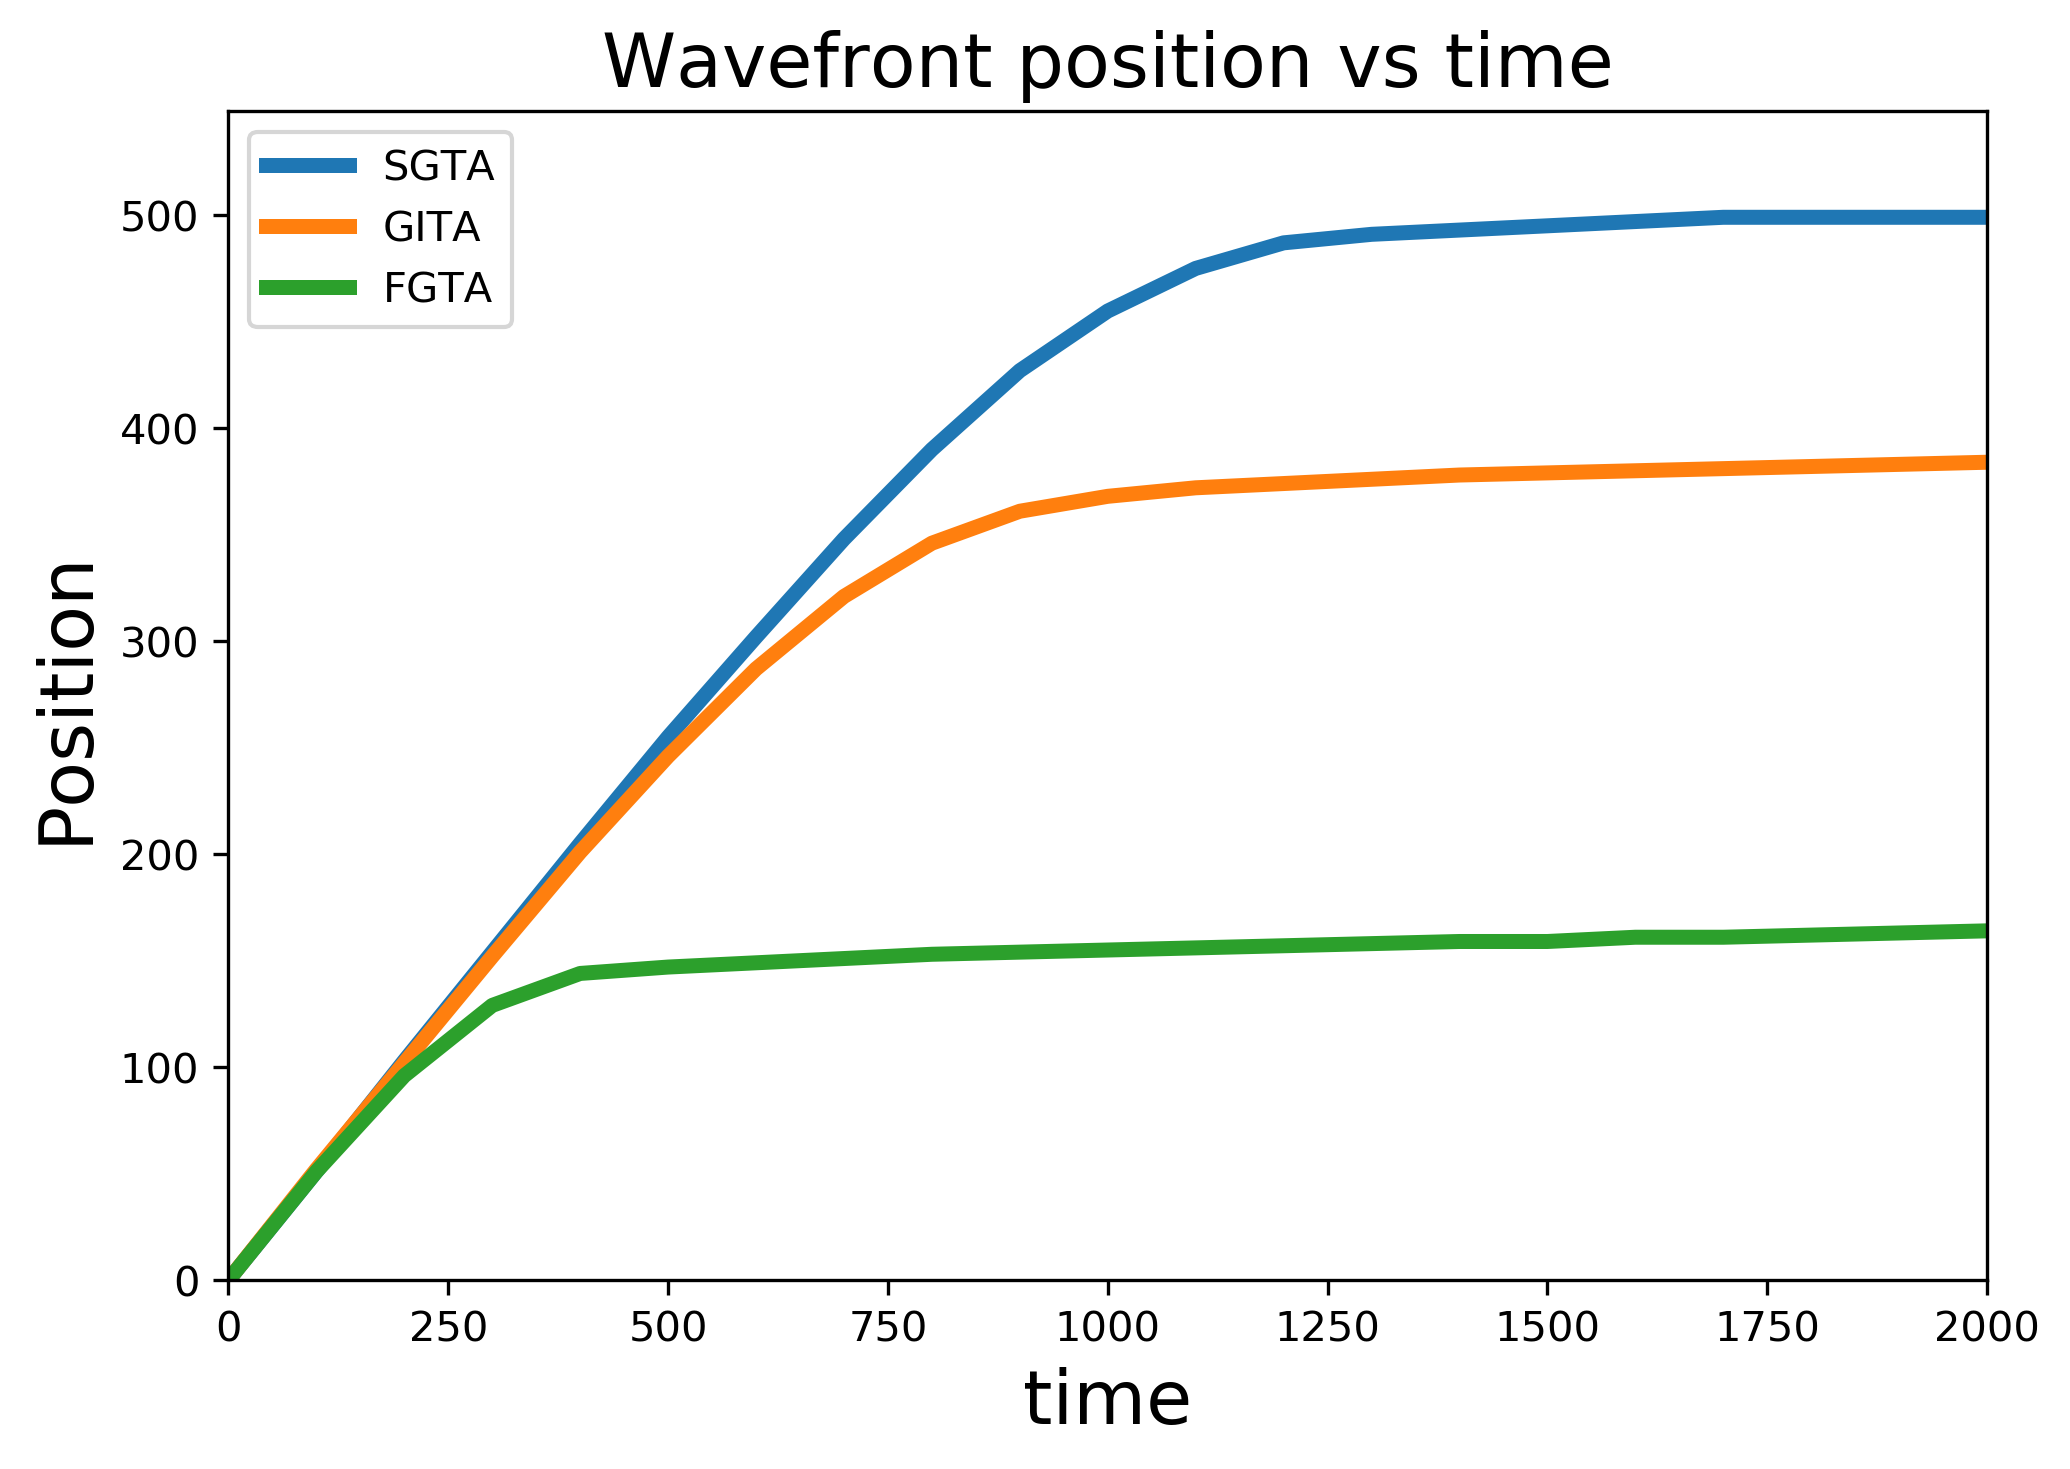

In [12]:
def plotWavefrontPositionsVsT(data1, data2, data3, filename):
    
    popThreshold = 20.
    t = [i for i in np.linspace(0., 2000., 21)]
    data1_wavefronts = []
    data2_wavefronts = []
    data3_wavefronts = []
    
    #here we iterate over the input data and get the max indices of the data where the population
    #is above a certain threshold. this gives us the wavefron position over time
    for i in range(1, len(data1)):
        data1_wavefronts.append(max((x, y) for x, y in enumerate(data1[i]) if y > popThreshold)[0])
        data2_wavefronts.append(max((x, y) for x, y in enumerate(data2[i]) if y > popThreshold)[0])
        data3_wavefronts.append(max((x, y) for x, y in enumerate(data3[i]) if y > popThreshold)[0])
    
    
    maxYVal = max(max(data1_wavefronts), max(data2_wavefronts), max(data3_wavefronts))
    
    
    lineWidth = 3.6
    #fig, axarr = plt.subplots(1, 3, sharey=True, figsize=(8,3), dpi=300)
    #axarr[0].plot(t, data1_wavefronts)
    #axarr[1].plot(t, data2_wavefronts)
    #axarr[2].plot(t, data3_wavefronts)
    #lets do them all in one plot, can change later if needs be
    plt.figure(figsize=(7,5), dpi=300)
    plt.plot(t, data3_wavefronts, linewidth=lineWidth, label='SGTA')
    plt.plot(t, data2_wavefronts, linewidth=lineWidth, label='GITA')
    plt.plot(t, data1_wavefronts, linewidth=lineWidth, label='FGTA')
   
    plt.legend(loc='upper left')
    
    plt.xlim(0, 2000)
    plt.ylim(0, 1.1*maxYVal)
    plt.xlabel("time", fontsize=18)
    plt.ylabel("Position", fontsize=18)
    plt.title("Wavefront position vs time", fontsize=18)
    
    plt.tight_layout()
    plt.savefig(filename)
    
    
filename='wavefront_position_vs_time_specificAlpha.png'
plotWavefrontPositionsVsT(FGTA_simple_alpha_specificAlpha_spatial, GITA_simple_alpha_specificAlpha_spatial, SGTA_simple_alpha_specificAlpha_spatial, filename)
    

[0.46, 0.45, 0.43, 0.45, 0.44, 0.43, 0.43, 0.44, 0.43, 0.43, 0.43, 0.17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


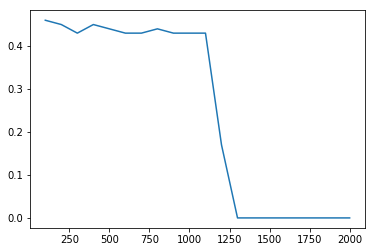

In [13]:
def plotWaveSpeeds(data_array):
    
    popThreshold = 20
    timestep = 100.
    wavespeedArray = []
    t = np.linspace(100., 2000., 20)
    
    
    
    '''def extractWavespeeds(data):
        wavespeeds = []
        for i in range(2, len(data)):
            #print(data[i])
            wavefront_posit = max((x, y) for x, y in enumerate(data[i]) if y > popThreshold)[0]
            prev_wavefront_posit = max((x, y) for x, y in enumerate(data[i-1]) if y > popThreshold)[0]
            wavespeeds.append((wavefront_posit-prev_wavefront_posit)/timestep)
        
        return wavespeeds
    
    for data in data_array:
        wavespeedArray.append(extractWavespeeds(data))
    '''
    
    wavespeedList = []
    #print(len(data_array))
    for i in range(2, len(data_array)):
        wavefront_posit = max((x, y) for x, y in enumerate(data_array[i]) if y > popThreshold)[0]
        prev_wavefront_posit = max((x, y) for x, y in enumerate(data_array[i-1]) if y > popThreshold)[0]
        wavespeedList.append((wavefront_posit-prev_wavefront_posit)/timestep)
        
    #wavespeedList.append(sub_dataWavespeeds)
    #del(sub_dataWavespeeds)
    #'''
    print(wavespeedList)
    plt.plot(t, wavespeedList)
    plt.show()
    
def bla(data):
    for i in range(1, len(data)):
        plt.plot(data[0], data[i], linewidth=1.8)
    plt.show()
    
datalist = [FGTA_simple_c_05_spatial, FGTA_simple_c_1_spatial]
#bla(datalist[0])
plotWaveSpeeds(FGTA_simple_c_05_spatial)

In [14]:
def plotWaveSpeeds2(data_array):
    '''this isnt working as sometimes there arent any microhabitats above the pop threshold'''
    
    popThreshold = 20
    timestep = 100.
    t = np.linspace(100., 2000., 20)
    waveSpeedArray = []
    
    def extractWavespeeds(input_data):
        wavespeedList = []
        #maxindices = np.where(input_data[2] > popThreshold)
        #print(np.amax(maxindices))
        #for i in range(2, len(input_data)):
         #   wavefront_posit = max((x, y) for x, y in enumerate(input_data[i]) if y > popThreshold)[0]
          #  prev_wavefront_posit = max((x, y) for x, y in enumerate(input_data[i-1]) if y > popThreshold)[0]
           # wavespeedList.append((wavefront_posit-prev_wavefront_posit)/timestep)
        for i in range(2, len(input_data)):
            #print(len(input_data[i]))
            #print(np.amax(np.where(input_data[i] > popThreshold)))
            #print((np.where(input_data[i] > popThreshold)))
            #wavefront_x = np.amax(np.where(input_data[i] > popThreshold))
            #wavefront_prev_x = np.amax(np.where(input_data[i-1] > popThreshold))
            x=6
        return wavespeedList
        
    for i in range(0, len(data_array)):
        print(len(data_array[1]))
        #print(type(data_array[i]))
        waveSpeedArray.append(extractWavespeeds(data_array[i]))
    #listo = extractWavespeeds(data_array[0]) 
    #print(listo)
    #for datums in data_array:
     #   waveSpeedArray.append(extractWavespeeds(datums))
    
    #print(waveSpeedArray)
    
    

datalist = [FGTA_simple_c_05_spatial, FGTA_simple_c_1_spatial]
#print(datalist)

plotWaveSpeeds2(datalist)      
        
        

22
22


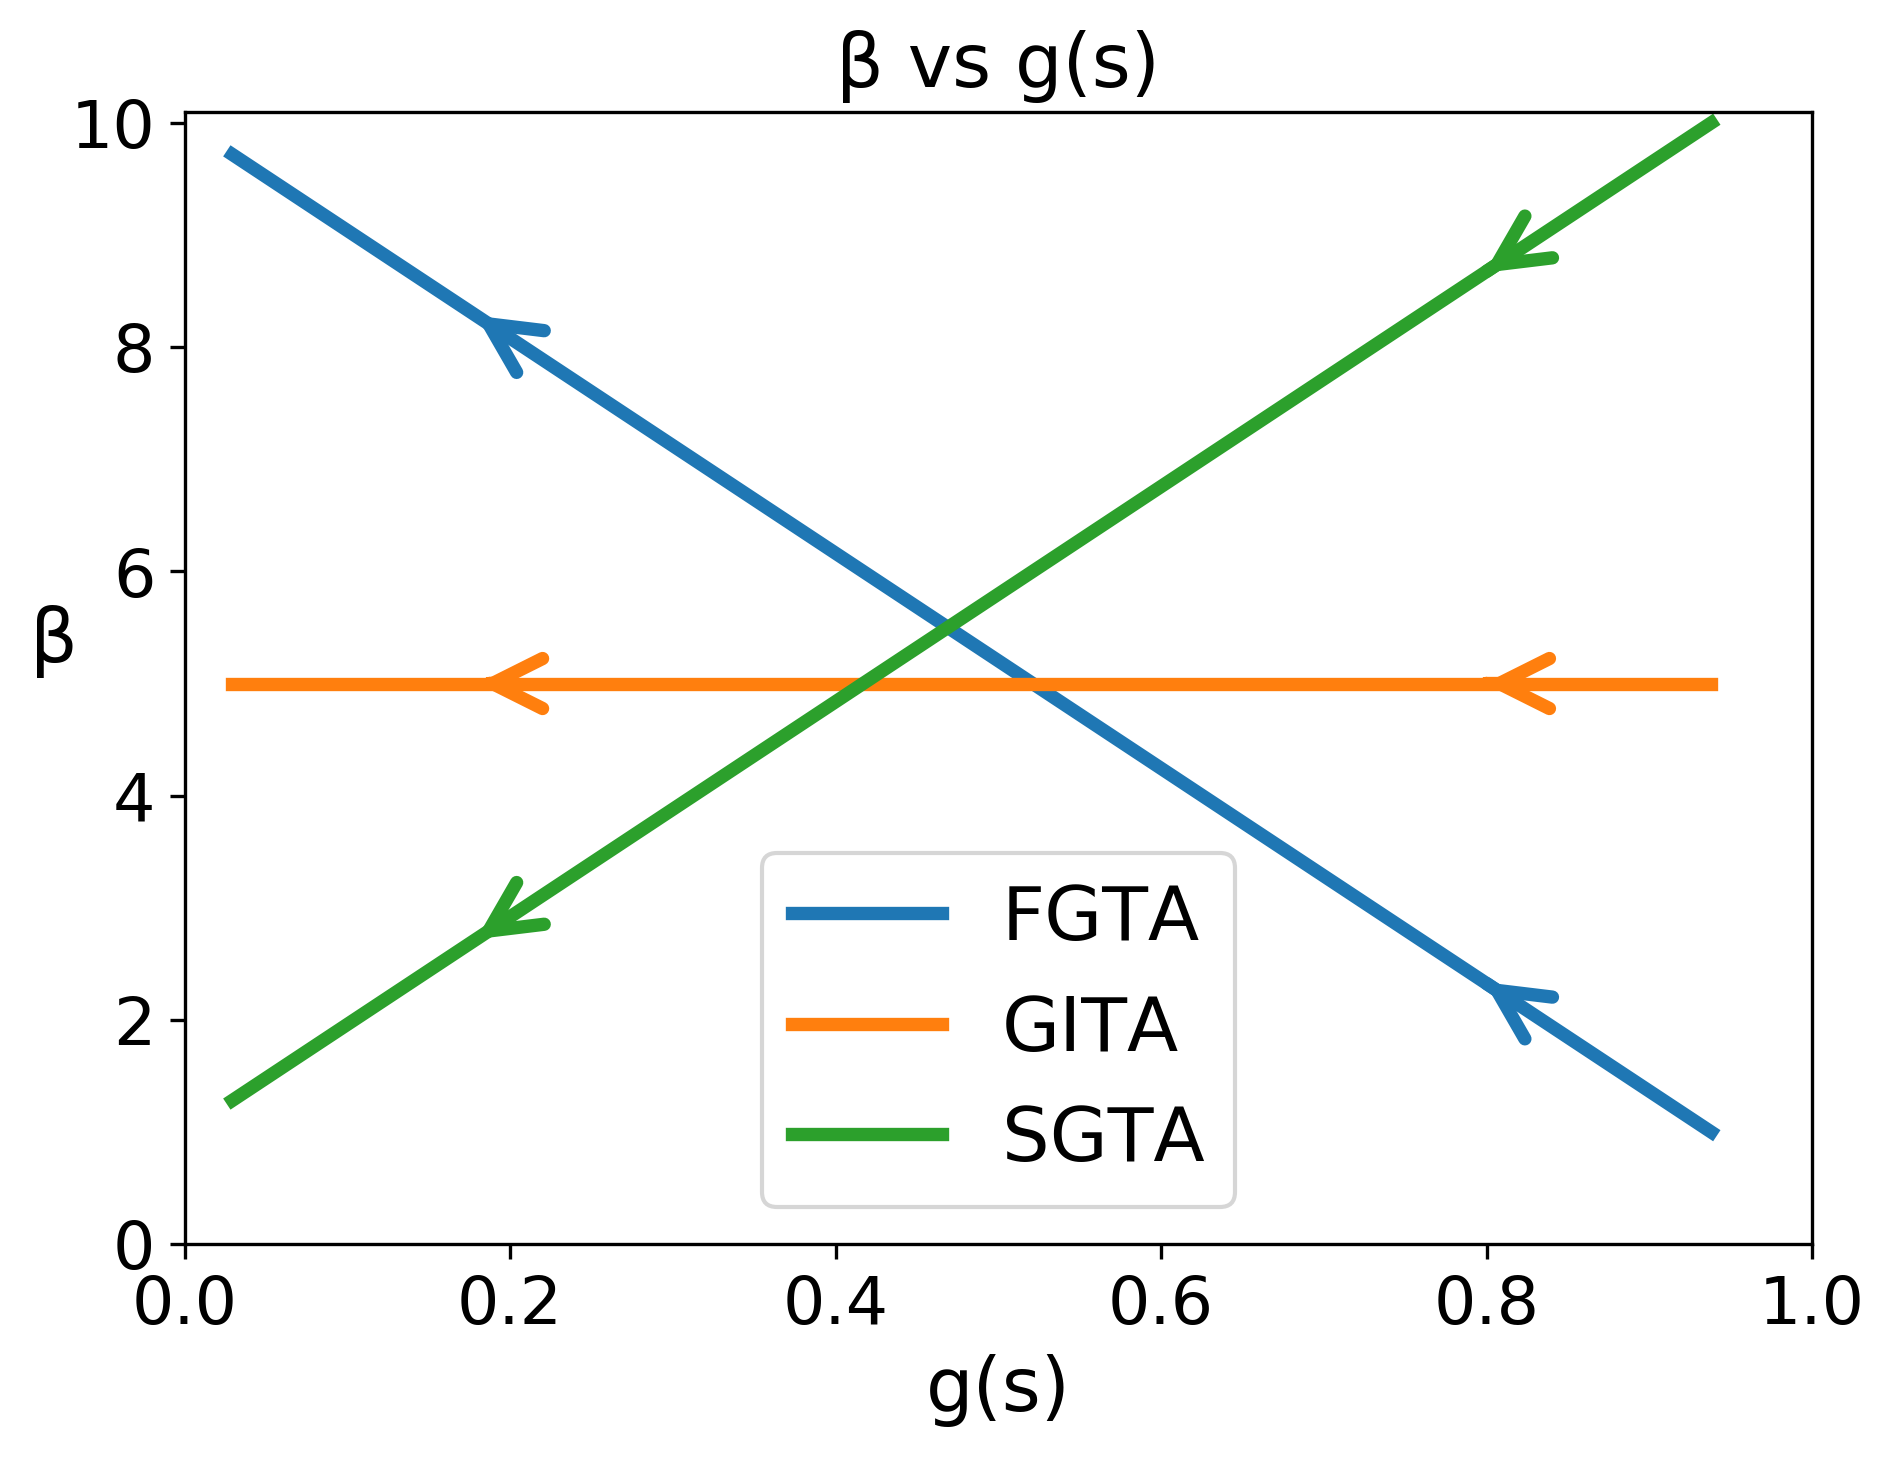

In [15]:
def add_arrow(line, position=None, direction='right', size=15, color=None, lineWidth=10):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color, linewidth=lineWidth),
        size=size
    )






def plotBetasOverTime():
    
    K = 33.
    S_max = 500
    mu_max = S_max/(K + S_max)
    
    S = list(range(500, 0, -1))
    mu = [x/y for x, y in zip(S, [K+s for s in S])]
    #print(mu)
    betaFGTA = [10. - 9.*m/mu_max for m in mu]
    betaGITA = [5 for m in mu]
    betaSGTA = [1. + 9.*m/mu_max for m in mu]
    
    plt.figure(figsize=(7,5), dpi=300)
    lineWidth = 3.2
    
    lineFGTA = plt.plot(mu, betaFGTA, label = 'FGTA', linewidth=lineWidth)[0]
    lineGITA = plt.plot(mu, betaGITA, label = 'GITA', linewidth=lineWidth)[0]
    lineSGTA = plt.plot(mu, betaSGTA, label = 'SGTA', linewidth=lineWidth)[0]
    add_arrow(lineFGTA, position=0.2, size=30, lineWidth=lineWidth)
    add_arrow(lineGITA, position=0.2, size=30, lineWidth=lineWidth)
    add_arrow(lineSGTA, position=0.2, size=30, lineWidth=lineWidth)
    add_arrow(lineFGTA, position=0.8, size=30, lineWidth=lineWidth)
    add_arrow(lineGITA, position=0.8, size=30, lineWidth=lineWidth)
    add_arrow(lineSGTA, position=0.8, size=30, lineWidth=lineWidth)
    
    plt.title('β vs g(s)', fontsize=18)
    plt.ylabel('β', fontsize=18, rotation=0)
    plt.xlabel('g(s)', fontsize=18)
    plt.ylim(0, 10.1)
    plt.xlim(0, 1.0)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.legend(loc='lower center', fontsize=18)
    plt.savefig('betas-over-time.png')
    
    
plotBetasOverTime()   
    
    

In [16]:
def plotRealisticAndBetaSwappedComparison(realisticData, BS_realisticData, filename):
    
    max_value = max(np.amax(realisticData[1:]), np.amax(BS_realisticData[1:]))
    min_value = min(np.amin(realisticData[1:]), np.amin(data2[1:]), np.amin(data3[1:]))
    max_value_X = max(np.amax(data1[0]), np.amax(data2[0]), np.amax(data3[0]))
    lineWidth = 1.5
    
    
    fig, axarr = plt.subplots(1, 3, sharey=True, figsize=(8,3), dpi=300)
    for i in range(1, len(data1)):
        if i%4 == 0:
            axarr[0].plot(data1[0], data1[i], linewidth=lineWidth, color='black')
            axarr[1].plot(data2[0], data2[i], linewidth=lineWidth, color='black')
            axarr[2].plot(data3[0], data3[i], linewidth=lineWidth, color='black')
        else:
            axarr[0].plot(data1[0], data1[i], linewidth=lineWidth, color=linColour)
            axarr[1].plot(data2[0], data2[i], linewidth=lineWidth, color=linColour)
            axarr[2].plot(data3[0], data3[i], linewidth=lineWidth, color=linColour)
            
    for ax in axarr:
        ax.set_xlim(0,500)
        ax.set_ylim(min_value+(0.1*min_value), max_value+(0.2*max_value))
        ax.tick_params(direction='in')
        # below code adds an arrow above the graphs indicating the direction of time
        ax.annotate('', xy=(0.7*max_value_X, 1.06*max_value), xytext=(0.2*max_value_X, 1.06*max_value), arrowprops=dict(arrowstyle="->"))
        ax.text(0.36*max_value_X, 1.08*max_value, 'time', fontsize=12)
      
    
    
    axarr[0].set_title('FGTA')
    axarr[1].set_title('GITA')
    axarr[2].set_title('SGTA')
    
    axarr[0].text(0.85*max_value_X, 1.05*max_value, '(a)', fontsize=16)
    axarr[1].text(0.85*max_value_X, 1.05*max_value, '(b)', fontsize=16)
    axarr[2].text(0.85*max_value_X, 1.05*max_value, '(c)', fontsize=16)
    
    axarr[0].set_ylabel(y_label, fontsize=16)
    axarr[1].set_xlabel('Microhabitat', fontsize=16)
    
    plt.subplots_adjust(wspace=0.8)
    plt.tight_layout()
    plt.savefig(filename)
    

In [17]:
def fig3_distbs_wavfronPos_gradtest(FGTA_spat, GITA_spat, SGTA_spat, FGTA_gRate, GITA_gRate, SGTA_gRate):
    
    #microhabs = np.arange(0, 500, 1)
    
    fig = plt.figure(figsize=(6, 3), dpi=300)
    gs = GridSpec(nrows=2, ncols=6)
    
    ax11 = fig.add_subplot(gs[0, :3])
    ax12 = fig.add_subplot(gs[0, 3:])
    
    ax21 = fig.add_subplot(gs[1, :2])
    ax22 = fig.add_subplot(gs[1, 2:4], sharey=ax21)
    ax23 = fig.add_subplot(gs[1, 4:], sharey=ax21)

    #ax11 = fig.add_subplot(gs[:2, 0])
    #ax21 = fig.add_subplot(gs[2:4, 0])
    #ax31 = fig.add_subplot(gs[4:, 0])
    #ax12 = fig.add_subplot(gs[:3, 1])
    #ax22 = fig.add_subplot(gs[3:, 1])
    #fig.tight_layout()

    #fig.tight_layout()
    ax11.plot(FGTA_spat[0], FGTA_spat[2])
    ax12.plot(FGTA_spat[0], FGTA_spat[2])
    ax21.plot(FGTA_spat[0], FGTA_spat[2])
    ax22.plot(FGTA_spat[0], FGTA_spat[2])
    ax23.plot(FGTA_spat[0], FGTA_spat[2])
    
    
    plt.setp(ax22.get_yticklabels(), visible=False)
    plt.setp(ax23.get_yticklabels(), visible=False)
    fig.tight_layout()
    #plt.tight_layout()
    plt.show()
    

    
#fig3_distbs_wavfronPos_gradtest(FGTA_simple_alpha_specificAlpha_spatial, GITA_simple_alpha_specificAlpha_spatial, SGTA_simple_alpha_specificAlpha_spatial, FGTA_simple_alpha_specificAlpha_gRate, GITA_simple_alpha_specificAlpha_gRate, SGTA_simple_alpha_specificAlpha_gRate)

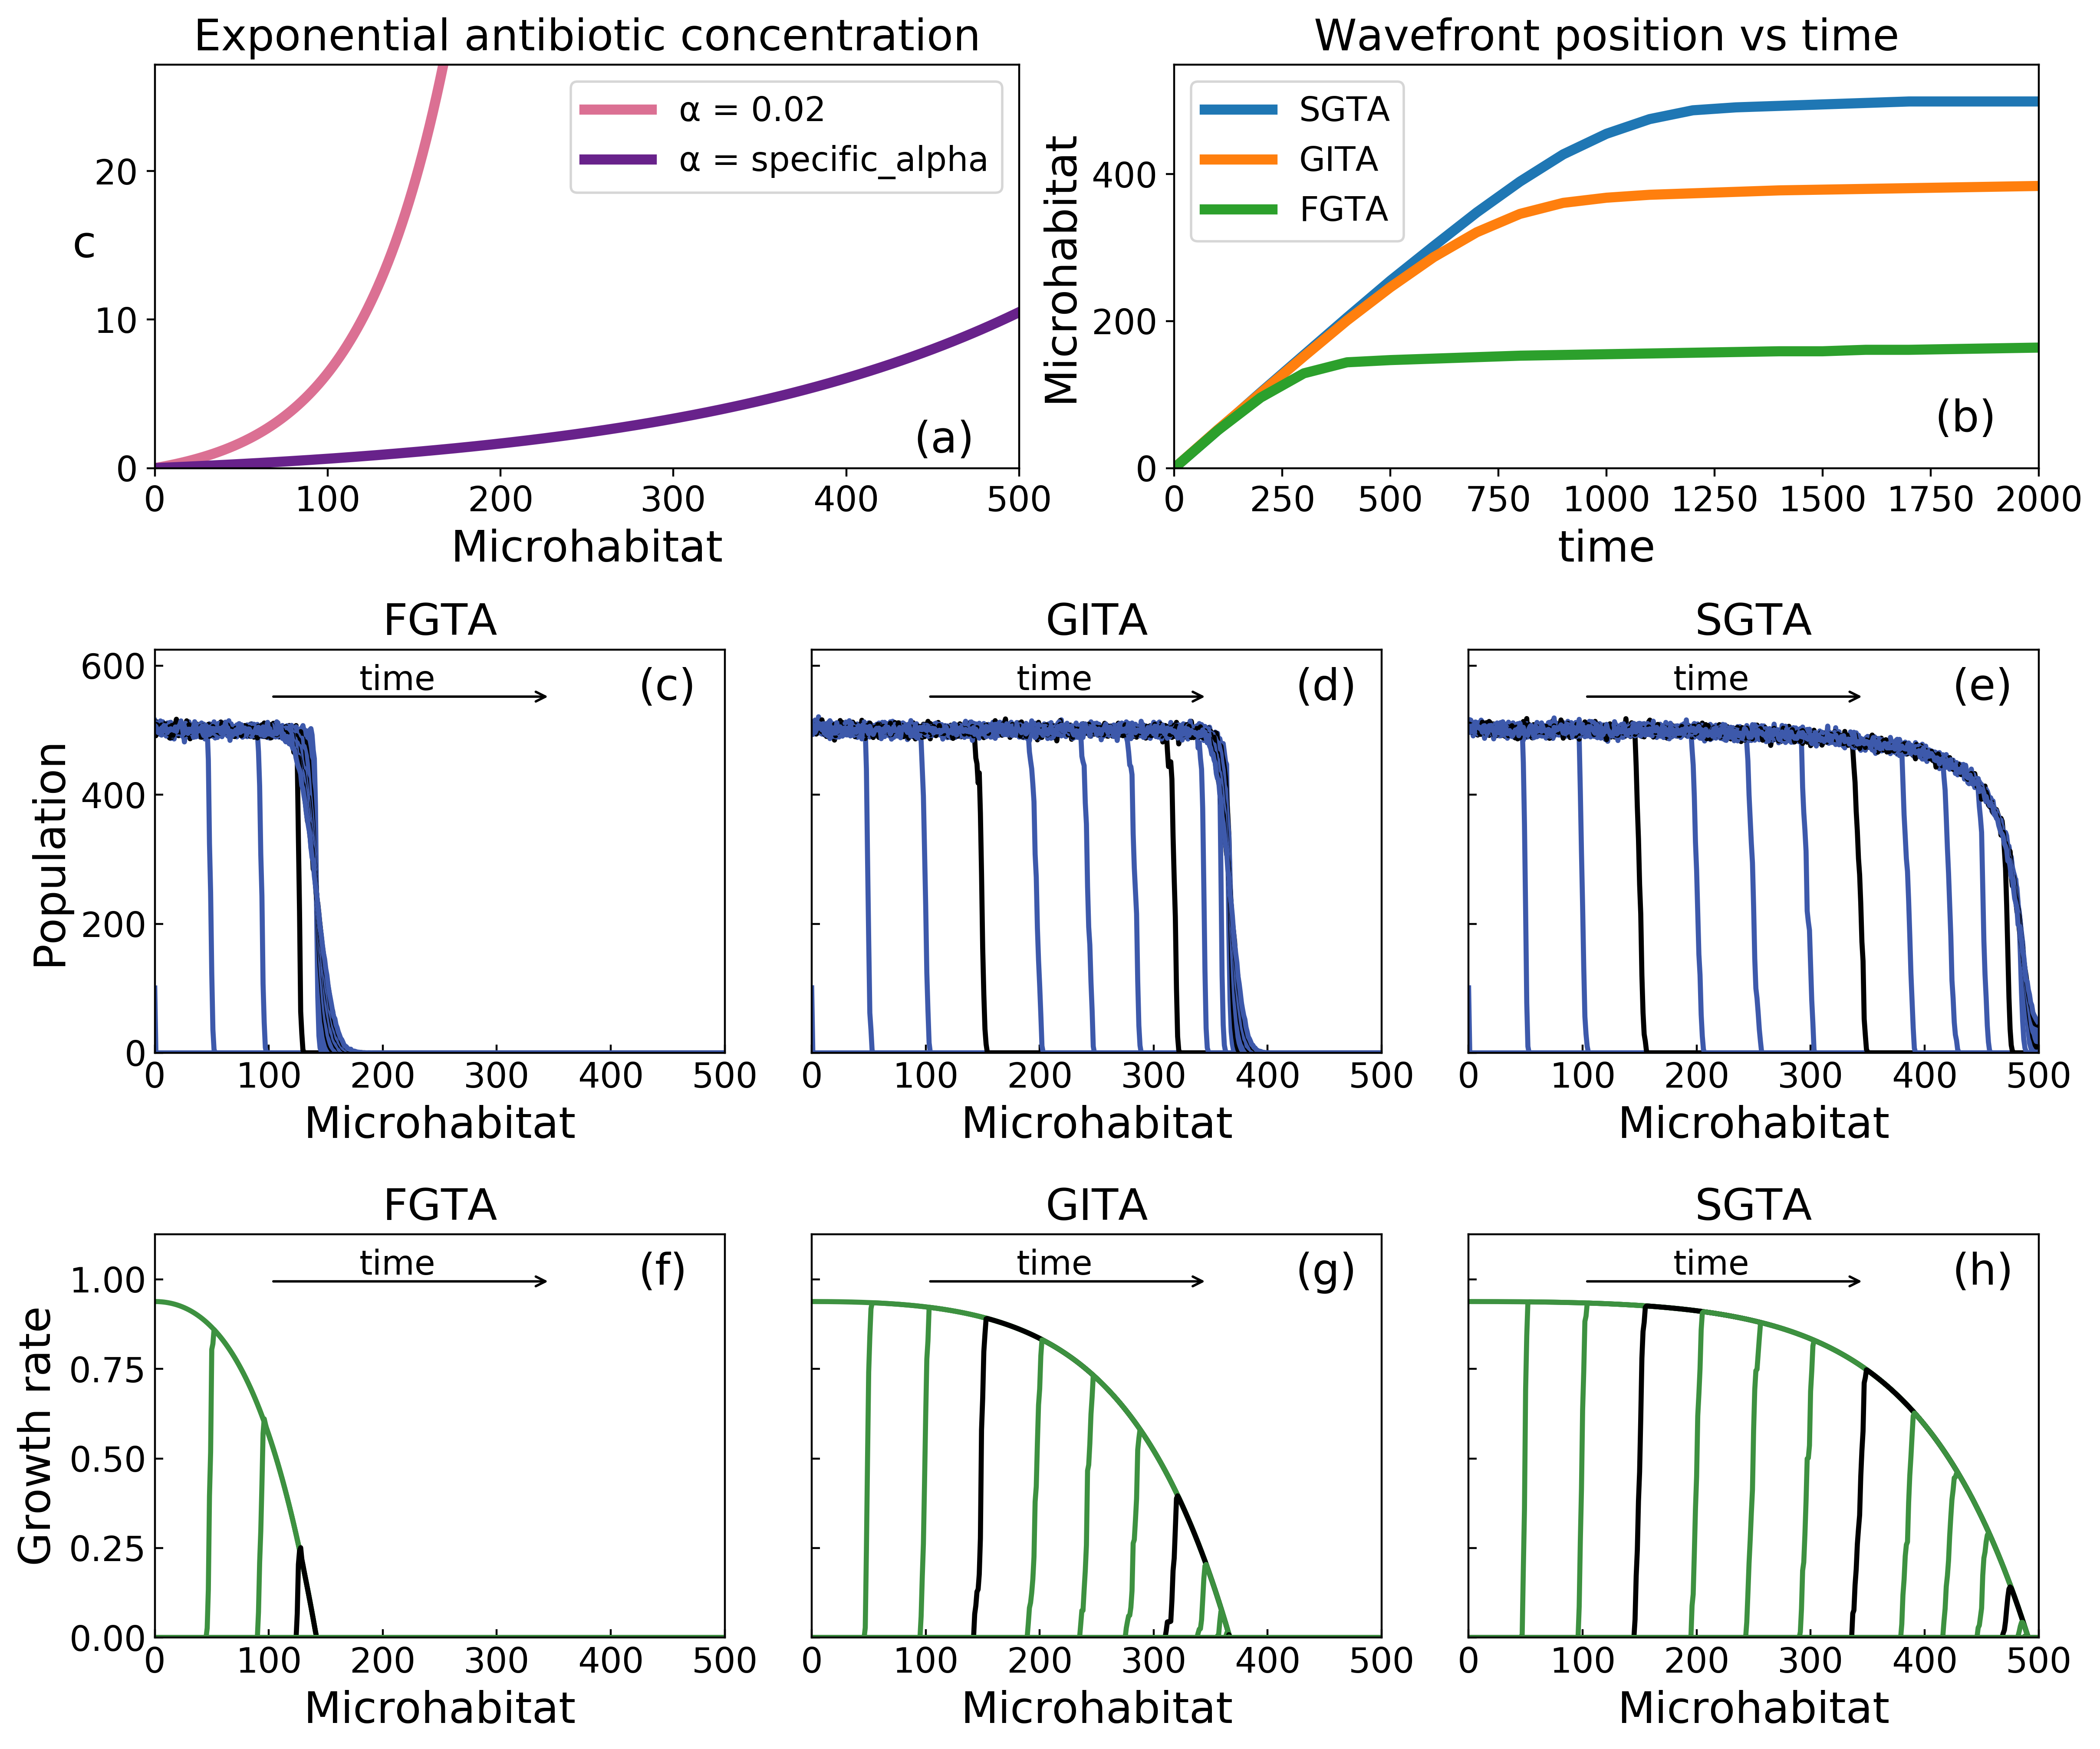

In [18]:
def fig3_distbs_wavfronPos_grad(FGTA_spat, GITA_spat, SGTA_spat, FGTA_gRate, GITA_gRate, SGTA_gRate):
    '''this is the big method to make figure 3? which has the pop and gRate distbs for the simple 
    growth curves, specific alpha, no death. also has '''
    
    # max and min values of population and gRate distributions, used for fine tuning graphs
    max_value_Pops = max(np.amax(FGTA_spat[1:]), np.amax(GITA_spat[1:]), np.amax(SGTA_spat[1:]))
    min_value_Pops = min(np.amin(FGTA_spat[1:]), np.amin(GITA_spat[1:]), np.amin(SGTA_spat[1:]))
    max_value_gRate = max(np.amax(FGTA_gRate[1:]), np.amax(GITA_gRate[1:]), np.amax(SGTA_gRate[1:]))
    min_value_gRate = min(np.amin(FGTA_gRate[1:]), np.amin(GITA_gRate[1:]), np.amin(SGTA_gRate[1:]))
    max_value_X = max(np.amax(FGTA_spat[0]), np.amax(GITA_spat[0]), np.amax(SGTA_spat[0]))
    
    # accent line colours for spatial and gRates
    linColour_spat = '#3D59AB'
    linColour_gRate = '#3D9140'
    
    # size and quality of the image
    fig = plt.figure(figsize=(14, 12), dpi=400)
    
    #use this to adjust the individual no. of gridspecs involved
    gs0 = gridspec.GridSpec(nrows=3, ncols=1, hspace=0.45)
    
    # here the individual subfigures are adjusted and spacing sorted out
    # this is the plots of wavefront position and antibiotic gradient
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=6, subplot_spec=gs0[0], wspace=0.84)
    ax11 = fig.add_subplot(gs00[0, :3])
    ax12 = fig.add_subplot(gs00[0, 3:])
    
    #this is the population distributions over time
    gs01 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=6, subplot_spec=gs0[1], wspace=0.36)
    ax21 = fig.add_subplot(gs01[0, :2])
    ax22 = fig.add_subplot(gs01[0, 2:4], sharey=ax21)
    ax23 = fig.add_subplot(gs01[0, 4:], sharey=ax21)
    
    # this is the gRate distributions over time
    gs02 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=6, subplot_spec=gs0[2], wspace=0.36)
    ax31 = fig.add_subplot(gs02[0, :2])
    ax32 = fig.add_subplot(gs02[0, 2:4], sharey=ax31)
    ax33 = fig.add_subplot(gs02[0, 4:], sharey=ax31)
    
    # combine all the axes into lists
    spatAxArr = [ax21, ax22, ax23]
    gRateAxArr = [ax31, ax32, ax33]
    allAxArr = [ax11, ax12, ax21, ax22, ax23, ax31, ax32, ax33]
    
    # here the data is added to the plots
    lineWidthThicc = 4.2
    lineWidth = 2.1
    #this is the exponential gradient comparisons
    cExp_specAlpha = getExponentialAntibioticConcentrations(alpha=0.004884694070738408, xData=FGTA_spat[0])
    cExp_002 = getExponentialAntibioticConcentrations(alpha=0.02, xData=FGTA_spat[0])
    
    ax11.plot(FGTA_spat[0], cExp_002, linewidth=lineWidthThicc, color='#DB7093', label='α = 0.02')
    ax11.plot(FGTA_spat[0], cExp_specAlpha, linewidth=lineWidthThicc, color='#68228B', label='α = specific_alpha')
    
    
    # this is the wavefront vs time section. firstly the wavefronts are extracted from the data
    FGTA_waves, GITA_waves, SGTA_waves, t = getWavefrontPositionsVsT(FGTA_spat, GITA_spat, SGTA_spat)
    maxWaveVal = max(max(FGTA_waves), max(GITA_waves), max(SGTA_waves))
    
    ax12.plot(t, SGTA_waves, linewidth=lineWidthThicc, label='SGTA')
    ax12.plot(t, GITA_waves, linewidth=lineWidthThicc, label='GITA')
    ax12.plot(t, FGTA_waves, linewidth=lineWidthThicc, label='FGTA')
    
    # these are the population and growth rate distributions
    for i in range(1, len(FGTA_spat)):
        if i%4 == 0:
            ax21.plot(FGTA_spat[0], FGTA_spat[i], linewidth=lineWidth, color='black')
            ax22.plot(GITA_spat[0], GITA_spat[i], linewidth=lineWidth, color='black')
            ax23.plot(SGTA_spat[0], SGTA_spat[i], linewidth=lineWidth, color='black')
            
            ax31.plot(FGTA_gRate[0], FGTA_gRate[i], linewidth=lineWidth, color='black')
            ax32.plot(GITA_gRate[0], GITA_gRate[i], linewidth=lineWidth, color='black')
            ax33.plot(SGTA_gRate[0], SGTA_gRate[i], linewidth=lineWidth, color='black')
        else:
            ax21.plot(FGTA_spat[0], FGTA_spat[i], linewidth=lineWidth, color=linColour_spat)
            ax22.plot(GITA_spat[0], GITA_spat[i], linewidth=lineWidth, color=linColour_spat)
            ax23.plot(SGTA_spat[0], SGTA_spat[i], linewidth=lineWidth, color=linColour_spat)
            
            ax31.plot(FGTA_gRate[0], FGTA_gRate[i], linewidth=lineWidth, color=linColour_gRate)
            ax32.plot(GITA_gRate[0], GITA_gRate[i], linewidth=lineWidth, color=linColour_gRate)
            ax33.plot(SGTA_gRate[0], SGTA_gRate[i], linewidth=lineWidth, color=linColour_gRate)
            
            
    
    
    
    
    # here the formatting and titles etc is done
    # these set the inner y labels invisible for neatness 
    plt.setp(ax22.get_yticklabels(), visible=False)
    plt.setp(ax23.get_yticklabels(), visible=False)
    plt.setp(ax32.get_yticklabels(), visible=False)
    plt.setp(ax33.get_yticklabels(), visible=False)
    
    # sets correct x and y lims and adds time arrows
    # this is the graphs for the population distributions
    for ax in spatAxArr:
        ax.set_xlim(0, 500)
        ax.set_ylim(min_value_Pops+(0.1*min_value_Pops), max_value_Pops+(0.2*max_value_Pops))
        ax.tick_params(direction='in')
        # below code adds an arrow above the graphs indicating the direction of time
        ax.annotate('', xy=(0.7*max_value_X, 1.06*max_value_Pops), xytext=(0.2*max_value_X, 1.06*max_value_Pops), arrowprops=dict(arrowstyle="->"))
        ax.text(0.36*max_value_X, 1.08*max_value_Pops, 'time', fontsize=14)

        
    # this is for the gRate distributions
    for ax in gRateAxArr:
        ax.set_xlim(0, 500)
        ax.set_ylim(min_value_gRate+(0.1*min_value_gRate), max_value_gRate+(0.2*max_value_gRate))
        ax.tick_params(direction='in')
        # below code adds an arrow above the graphs indicating the direction of time
        ax.annotate('', xy=(0.7*max_value_X, 1.06*max_value_gRate), xytext=(0.2*max_value_X, 1.06*max_value_gRate), arrowprops=dict(arrowstyle="->"))
        ax.text(0.36*max_value_X, 1.08*max_value_gRate, 'time', fontsize=14)
        
        
    # this is for all the axes, to make the number fonts bigger
    for ax in allAxArr:
        ax.xaxis.set_tick_params(labelsize=14.4)
        ax.yaxis.set_tick_params(labelsize=14.4)

    
    
    # add labels, titles etc here 
    titleSize = 18
    labelSize = 18
    numbersize = 14
    legendsize = 14
    IDsize=18
    
    ax11.set_title('Exponential antibiotic concentration', fontsize=titleSize)
    ax11.set_xlabel('Microhabitat', fontsize=labelSize)
    ax11.set_ylabel('c', fontsize=labelSize, rotation=0)
    ax11.set_xlim(0, 500)
    ax11.set_ylim(0, 2.6*cExp_specAlpha[-1])
    ax11.legend(loc='upper right', fontsize=legendsize)
    
    ax12.set_xlim(0, 2000)
    ax12.set_ylim(0, 1.1*maxWaveVal)
    ax12.set_title('Wavefront position vs time', fontsize=titleSize)
    ax12.set_xlabel('time', fontsize=labelSize)
    ax12.set_ylabel('Microhabitat', fontsize=labelSize)
    ax12.legend(loc='upper left', fontsize=legendsize)
    
    ax21.set_title('FGTA', fontsize=titleSize)
    ax21.set_ylabel('Population', fontsize=labelSize)
    ax21.set_xlabel('Microhabitat', fontsize=labelSize)
    ax22.set_title('GITA', fontsize=titleSize)
    ax22.set_xlabel('Microhabitat', fontsize=labelSize)
    ax23.set_title('SGTA', fontsize=titleSize)
    ax23.set_xlabel('Microhabitat', fontsize=labelSize)
    
    ax31.set_title('FGTA', fontsize=titleSize)
    ax31.set_ylabel('Growth rate', fontsize=labelSize)
    ax31.set_xlabel('Microhabitat', fontsize=labelSize)
    ax32.set_title('GITA', fontsize=titleSize)
    ax32.set_xlabel('Microhabitat', fontsize=labelSize)
    ax33.set_title('SGTA', fontsize=titleSize)
    ax33.set_xlabel('Microhabitat', fontsize=labelSize)
    
    
    ax11.text(0.88*max_value_X, 0.1*cExp_specAlpha[-1], '(a)', fontsize=IDsize)
    ax12.text(0.88*t[-1], 0.1*SGTA_waves[-1], '(b)', fontsize=IDsize)
    
    ax21.text(0.85*max_value_X, 1.05*max_value_Pops, '(c)', fontsize=IDsize)
    ax22.text(0.85*max_value_X, 1.05*max_value_Pops, '(d)', fontsize=IDsize)
    ax23.text(0.85*max_value_X, 1.05*max_value_Pops, '(e)', fontsize=IDsize)
    
    ax31.text(0.85*max_value_X, 1.05*max_value_gRate, '(f)', fontsize=IDsize)
    ax32.text(0.85*max_value_X, 1.05*max_value_gRate, '(g)', fontsize=IDsize)
    ax33.text(0.85*max_value_X, 1.05*max_value_gRate, '(h)', fontsize=IDsize)
    
    #fig.tight_layout()
    #plt.tight_layout()
    plt.savefig('fig3_all_simple_distbs.png')
    plt.show()
    
    
    
    
    
    
fig3_distbs_wavfronPos_grad(FGTA_simple_alpha_specificAlpha_spatial, GITA_simple_alpha_specificAlpha_spatial, SGTA_simple_alpha_specificAlpha_spatial, FGTA_simple_alpha_specificAlpha_gRate, GITA_simple_alpha_specificAlpha_gRate, SGTA_simple_alpha_specificAlpha_gRate)

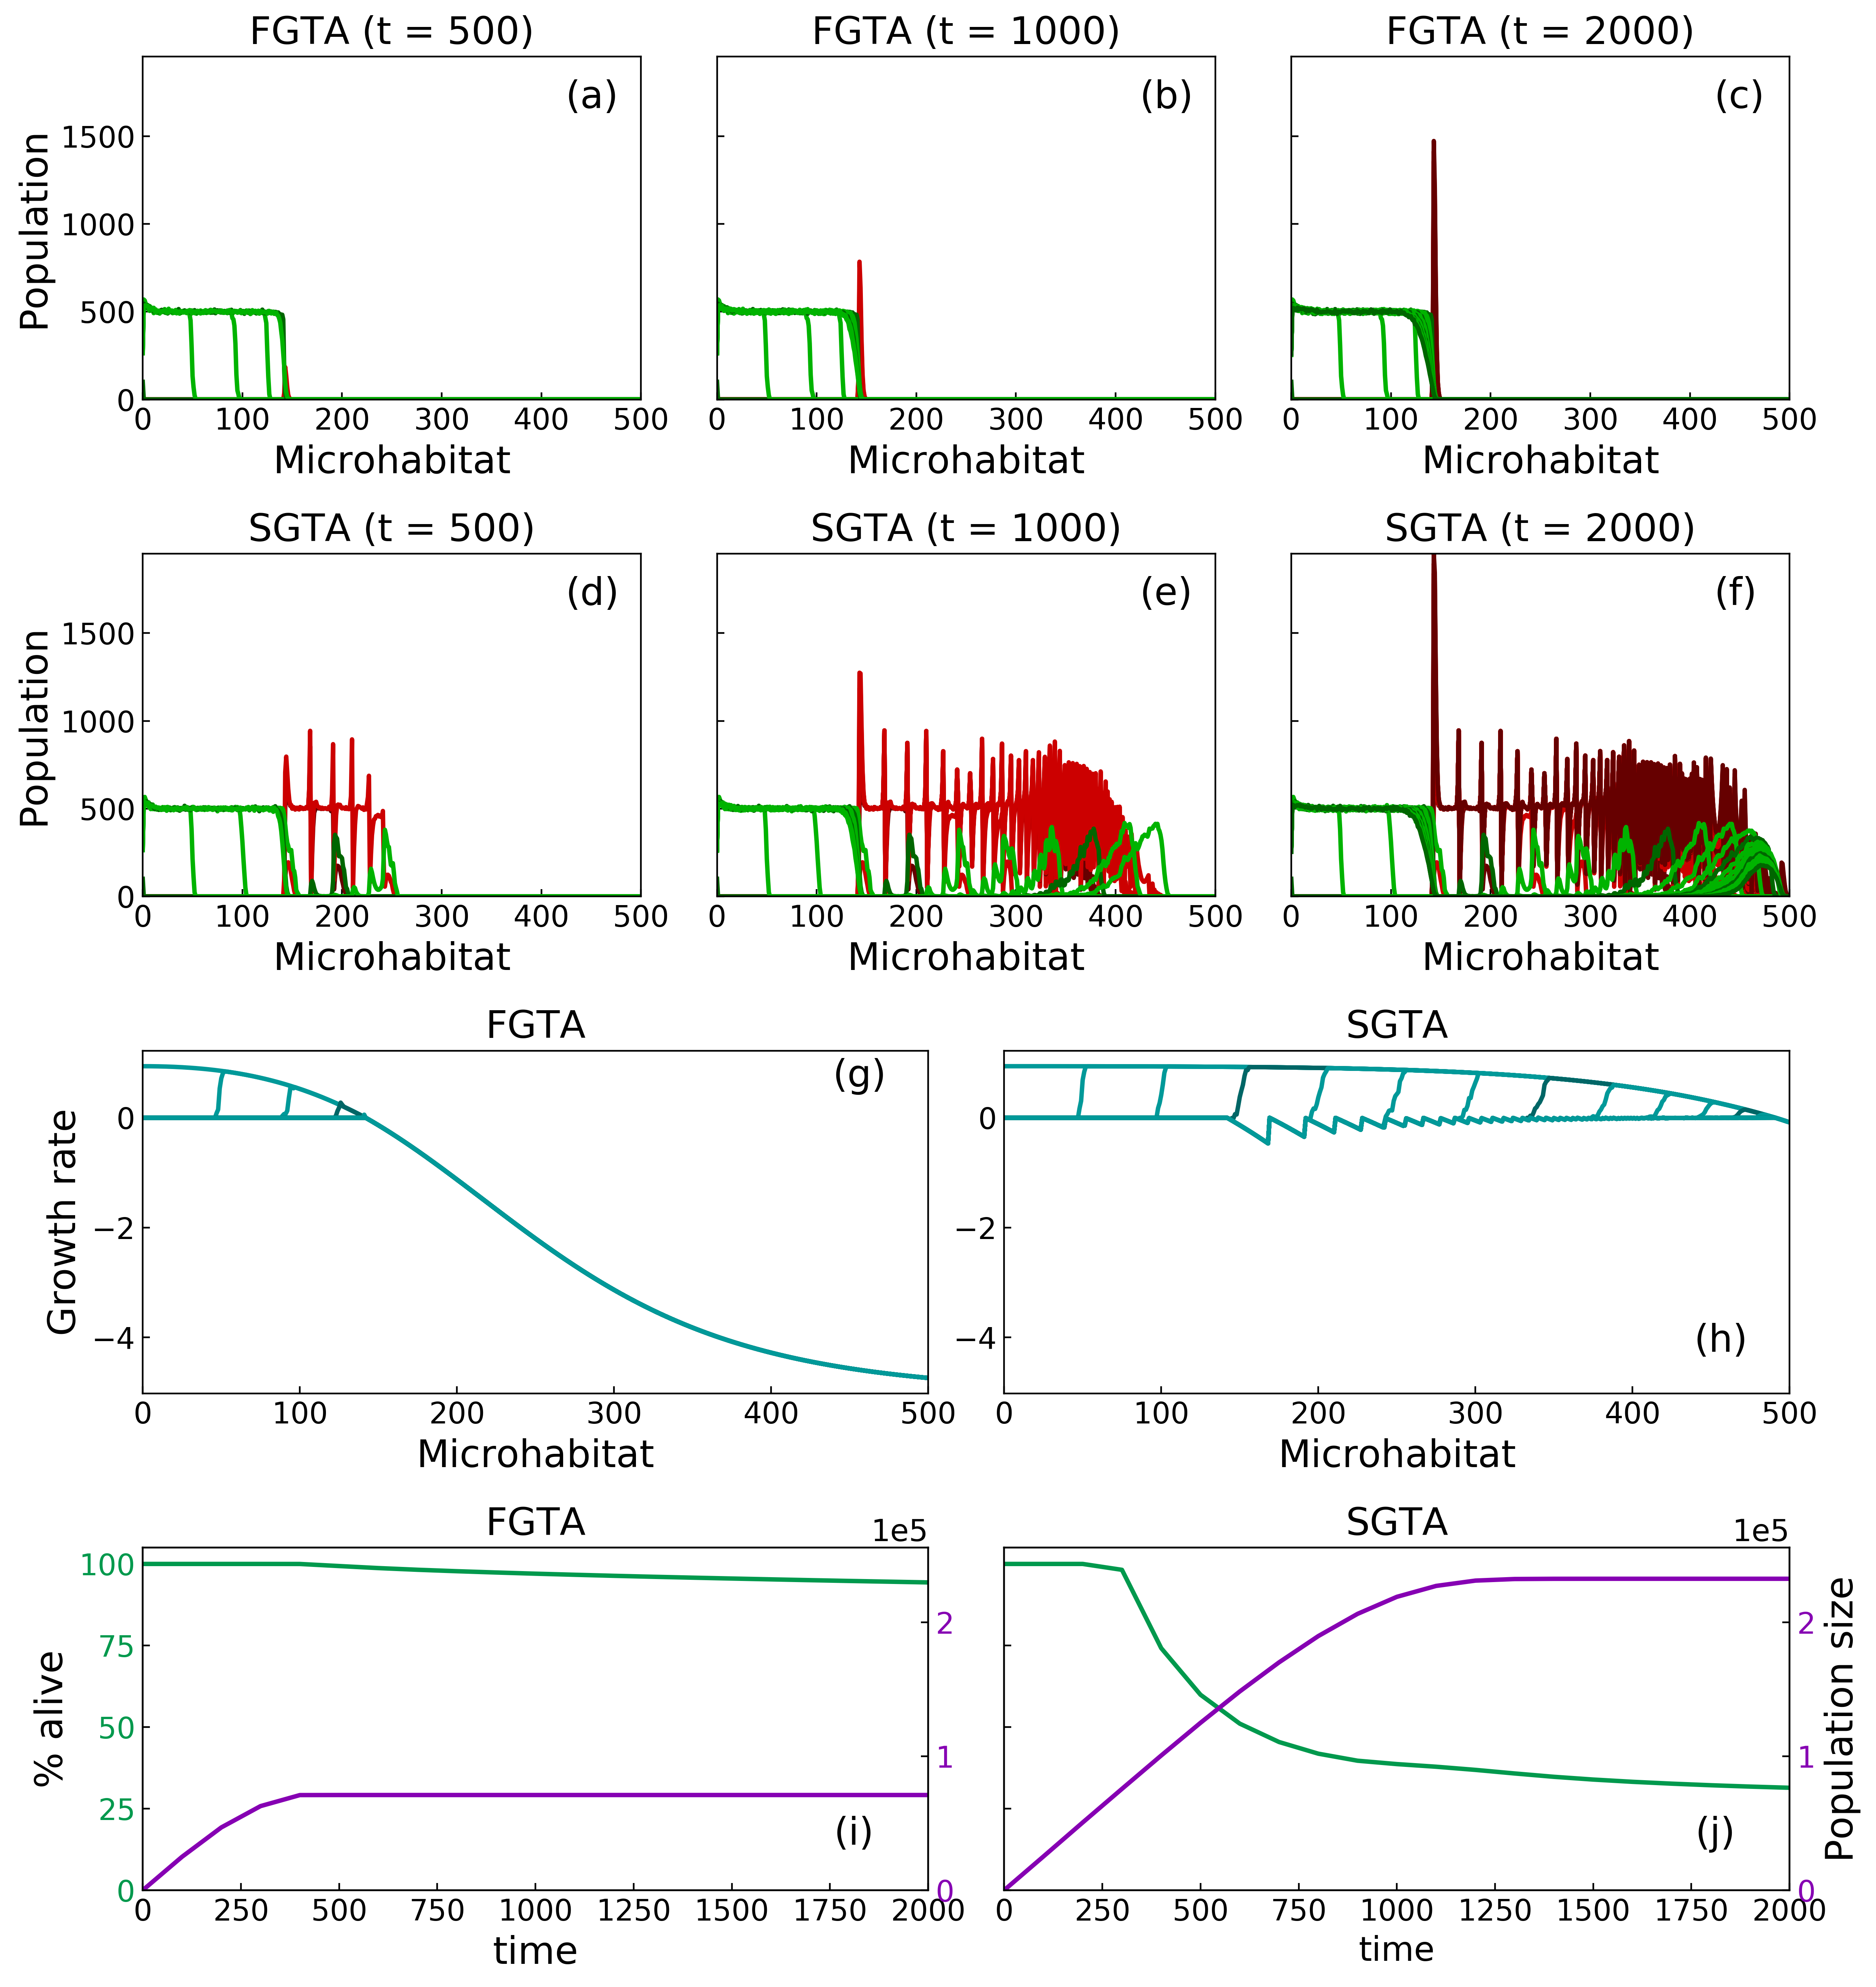

In [19]:
def plotAllDeathDistbs(FGTA_live, FGTA_dead, FGTA_gRate, SGTA_live, SGTA_dead, SGTA_gRate):
    '''this is a massive mthod to make one figure for all the with death stuff. has the alive and dead populations for 
    three time values, the growth rates, and the % alive compositions for the FGTA and SGTA systems'''
    
    max_value_pops = max(np.amax(FGTA_live[1:]), np.amax(FGTA_dead[1:]), np.amax(SGTA_live[1:]), np.amax(SGTA_dead[1:]))
    min_malue_pops = max(np.amin(FGTA_live[1:]), np.amin(FGTA_dead[1:]), np.amin(SGTA_live[1:]), np.amin(SGTA_dead[1:]))
    max_value_gRate = max(np.amax(FGTA_gRate[1:]), np.amax(SGTA_gRate[1:]))
    min_value_gRate = min(np.amin(FGTA_gRate[1:]), np.amin(SGTA_gRate[1:]))
    max_value_X = max(FGTA_live[0])
    
    
    # accent line colours for spatial and gRates
    linColour_alive = '#00b300'
    linColour_alive_accent = '#006600'
    linColour_dead = '#cc0000'
    linColour_dead_accent = '#660000'
    linColour_gRate = '#009999'
    linColour_gRate_accent = '#006666'
    
    # size and quality of the image
    fig = plt.figure(figsize=(14, 16), dpi=400)
    
    #use this to adjust the individual no. of gridspecs involved
    # this is the master gridspec which will have many nested gridspecs inside
    gs0 = gridspec.GridSpec(nrows=4, ncols=1, hspace=0.45)
    
    # here the individual subfigures are adjusted and spacing sorted out
    # this is the plots of the FGTA alive and dead over time
    #the notation is a bit shaky here, improve next time
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=6, subplot_spec=gs0[0], wspace=0.36)
    ax11 = fig.add_subplot(gs00[0, :2])
    ax12 = fig.add_subplot(gs00[0, 2:4], sharey=ax11)
    ax13 = fig.add_subplot(gs00[0, 4:], sharey=ax11)
    
    #this is SGTA alive and dead over time
    gs01 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=6, subplot_spec=gs0[1], wspace=0.36)
    ax21 = fig.add_subplot(gs01[0, :2])
    ax22 = fig.add_subplot(gs01[0, 2:4], sharey=ax21)
    ax23 = fig.add_subplot(gs01[0, 4:], sharey=ax21)
    
    # this is the two gRate distributions over time
    gs02 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=6, subplot_spec=gs0[2], wspace=0.36)
    ax31 = fig.add_subplot(gs02[0, :3])
    ax32 = fig.add_subplot(gs02[0, 3:], sharey=ax31)
    
    #this is the two percent alive plots
    gs03 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=6, subplot_spec=gs0[3], wspace=0.36)
    ax41 = fig.add_subplot(gs03[0, :3])
    ax42 = fig.add_subplot(gs03[0, 3:], sharey=ax41)
    
    # combine all the axes into lists
    FGTA_axArr = [ax11, ax12, ax13]
    SGTA_axArr = [ax21, ax22, ax23]
    gRateAxArr = [ax31, ax32]
    percentAxArr = [ax41, ax42]
    allAxArr = [ax11, ax12, ax13, ax21, ax22, ax23, ax31, ax32, ax41, ax42]
    
    # here the data is added to the plots
    lineWidthThicc = 4.2
    lineWidth = 2.1
    
    time1 = 500.
    time2 = 1000.
    time3 = 2000.
    timestep = 100.
    
    # this gets us the indexes of the total data corresponding to the desired cutoff times 
    get_tIndex = lambda time, timestep : int(time/timestep)+1
    
    tIndex1 = get_tIndex(time1, timestep)
    tIndex2 = get_tIndex(time2, timestep)
    tIndex3 = get_tIndex(time3, timestep)
    tIndexes = [tIndex1, tIndex2, tIndex3]
    
    #this is the FGTA and SGTA alive and dead over three time selections, t=500, 1000, 2000
    for i in range(0, len(tIndexes)):
        counter = 0
        for t in range(1, tIndexes[i]+1):
            
            if counter%4==0:
                FGTA_axArr[i].plot(FGTA_dead[0], FGTA_dead[t], color=linColour_dead_accent, linewidth=lineWidth)            
                SGTA_axArr[i].plot(SGTA_dead[0], SGTA_dead[t], color=linColour_dead_accent, linewidth=lineWidth)            
            
            else:
                FGTA_axArr[i].plot(FGTA_dead[0], FGTA_dead[t], color=linColour_dead, linewidth=lineWidth)            
                SGTA_axArr[i].plot(SGTA_dead[0], SGTA_dead[t], color=linColour_dead, linewidth=lineWidth)
            
            counter += 1
            
    for i in range(0, len(tIndexes)):
        counter = 0
        for t in range(1, tIndexes[i]+1):
            
            if counter%4==0:
                FGTA_axArr[i].plot(FGTA_live[0], FGTA_live[t], color=linColour_alive_accent, linewidth=lineWidth)
                SGTA_axArr[i].plot(SGTA_live[0], SGTA_live[t], color=linColour_alive_accent, linewidth=lineWidth)
        
            else:
                FGTA_axArr[i].plot(FGTA_live[0], FGTA_live[t], color=linColour_alive, linewidth=lineWidth)
                SGTA_axArr[i].plot(SGTA_live[0], SGTA_live[t], color=linColour_alive, linewidth=lineWidth)
            
            counter += 1
    
    
    ##############################################################################################################
    # now for the gRate ones
    for i in range(1, len(FGTA_gRate)):
        if i%4==0:
            ax31.plot(FGTA_gRate[0], FGTA_gRate[i], color=linColour_gRate_accent, linewidth=lineWidth)
            ax32.plot(SGTA_gRate[0], SGTA_gRate[i], color=linColour_gRate_accent, linewidth=lineWidth)
            
        else:
            ax31.plot(FGTA_gRate[0], FGTA_gRate[i], color=linColour_gRate, linewidth=lineWidth)
            ax32.plot(SGTA_gRate[0], SGTA_gRate[i], color=linColour_gRate, linewidth=lineWidth)
            
    ######################################################################################################       
    # now the percentage alive ones
    FGTA_percentAlive, FGTA_popSize = getPercentAliveAndPopSizeOverTime(FGTA_live, FGTA_dead)
    SGTA_percentAlive, SGTA_popSize = getPercentAliveAndPopSizeOverTime(liveData=SGTA_live, deadData=SGTA_dead)
    t = [i for i in np.linspace(0., 2000., 21)]
    
    maxOverallPopSize = max(max(FGTA_popSize), max(SGTA_popSize))
    maxPercentAlive = max(max(FGTA_percentAlive), max(SGTA_percentAlive))
    percentColor = '#00994d'
    popColor = '#8600b3'
    
    
    # This plots the two scales of % alive and size on the same graph. also sets colours and limits
    def two_scales(ax1, time, data1, data2, c1, c2):
        ax2 = ax1.twinx()
        ax1.plot(time, data1, color=c1, linewidth=2.1)
        ax1.set_xlabel('time', fontsize=16)
        ax1.set_ylim(0., 105.)
        
        ax2.plot(time, data2, color=c2, linewidth=2.1)
        ax2.set_ylim(0., 1.1*maxOverallPopSize)
        return ax1, ax2
    
    
    ax41, ax41a = two_scales(ax41, t, FGTA_percentAlive, FGTA_popSize, percentColor, popColor)
    ax42, ax42a = two_scales(ax42, t, SGTA_percentAlive, SGTA_popSize, percentColor, popColor)
    
    allAxArr.extend([ax41a, ax42a])

    # Change color of each axis
    def color_y_axis(ax, color):
        """Color your axes."""
        for yt in ax.get_yticklabels():
            yt.set_color(color)

    color_y_axis(ax41, percentColor)
    color_y_axis(ax41a, popColor)
    color_y_axis(ax42, percentColor)
    color_y_axis(ax42a, popColor)
   
    ###########################################################################################
    # add labels, titles etc here 
    # these set the inner y labels invisible for neatness 
    plt.setp(ax12.get_yticklabels(), visible=False)
    plt.setp(ax13.get_yticklabels(), visible=False)
    plt.setp(ax22.get_yticklabels(), visible=False)
    plt.setp(ax23.get_yticklabels(), visible=False)
    #plt.setp(ax41a.get_yticklabels(), visible=False)
    plt.setp(ax42.get_yticklabels(), visible=False)
    
    titleSize = 18
    labelSize = 18
    numbersize = 14
    legendsize = 14
    IDsize=18
    
    
    # pop size distributions 
    for FGTA_ax, SGTA_ax, tIndex in zip(FGTA_axArr, SGTA_axArr, tIndexes):
        tLabel = (tIndex-1)*100
        FGTA_ax.set_title('FGTA (t = '+str(tLabel)+')', fontsize=titleSize)
        FGTA_ax.set_xlabel('Microhabitat', fontsize=labelSize)
        FGTA_ax.set_xlim(0, 500)
        FGTA_ax.set_ylim(0, max_value_pops)
        
        SGTA_ax.set_title('SGTA (t = '+str(tLabel)+')', fontsize=titleSize)
        SGTA_ax.set_xlabel('Microhabitat', fontsize=labelSize)
        SGTA_ax.set_xlim(0, 500)
        SGTA_ax.set_ylim(0, max_value_pops)
        
        
    FGTA_axArr[0].set_ylabel('Population', fontsize=labelSize)
    SGTA_axArr[0].set_ylabel('Population', fontsize=labelSize)
    
    
    ####################################################################################
    # gRate distributons
    ax31.set_title('FGTA', fontsize=titleSize)
    ax31.set_ylabel('Growth rate', fontsize=labelSize)
    ax31.set_xlabel('Microhabitat', fontsize=labelSize)
    ax31.set_xlim(0, 500)
    
    ax32.set_title('SGTA', fontsize=titleSize)
    ax32.set_xlabel('Microhabitat', fontsize=labelSize)
    ax32.set_xlim(0, 500)
    
    #########################################################################################
    # percent alive and size
    ax41.set_title('FGTA', fontsize=titleSize)
    ax41.set_xlabel('time', fontsize=labelSize)
    ax41.set_xlim(0, max(t))
    ax41.set_ylabel('% alive', fontsize=labelSize)
    ax41a.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax41a.yaxis.offsetText.set_fontsize(14.4)
    
    ax42.set_title('SGTA', fontsize=titleSize)
    ax42a.set_ylabel('Population size', fontsize=labelSize)
    ax42.set_xlim(0, max(t))
    # this makes the axis in scientific notation. the next line makes the 1e5 bigger
    ax42a.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax42a.yaxis.offsetText.set_fontsize(14.4)
    
    for ax in allAxArr:
        ax.xaxis.set_tick_params(labelsize=14)
        ax.yaxis.set_tick_params(labelsize=14)
        ax.tick_params(direction='in')
    
    
    ax11.text(0.85*max_value_X, 0.85*max_value_pops, '(a)', fontsize=IDsize)
    ax12.text(0.85*max_value_X, 0.85*max_value_pops, '(b)', fontsize=IDsize)
    ax13.text(0.85*max_value_X, 0.85*max_value_pops, '(c)', fontsize=IDsize)
    
    ax21.text(0.85*max_value_X, 0.85*max_value_pops, '(d)', fontsize=IDsize)
    ax22.text(0.85*max_value_X, 0.85*max_value_pops, '(e)', fontsize=IDsize)
    ax23.text(0.85*max_value_X, 0.85*max_value_pops, '(f)', fontsize=IDsize)
    
    ax31.text(0.88*max_value_X, 0.6*max_value_gRate, '(g)', fontsize=IDsize) 
    ax32.text(0.88*max_value_X, 0.9*min_value_gRate, '(h)', fontsize=IDsize)
    
    ax41.text(0.88*max(t), 0.14*maxPercentAlive, '(i)', fontsize=IDsize)
    ax42.text(0.88*max(t), 0.14*maxPercentAlive, '(j)', fontsize=IDsize)
    
    
    plt.savefig('all_wDeath_distributions.png')
    plt.show()
    
plotAllDeathDistbs(FGTA_wDeath_alpha_specificAlpha_aliveSpatial, FGTA_wDeath_alpha_specificAlpha_deadSpatial, FGTA_wDeath_alpha_specificAlpha_gRate, SGTA_wDeath_alpha_specificAlpha_aliveSpatial, SGTA_wDeath_alpha_specificAlpha_deadSpatial, SGTA_wDeath_alpha_specificAlpha_gRate)
    
    